In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
import json
import seaborn as sns

In [2]:
#import data

df = pd.read_csv('./assets/electronics.csv', delimiter='\t')
df.head(2)

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     41409413  R2MTG1GCZLR2DK  B00428R89M       112201306   
1          US     49668221  R2HBOEM8LE9928  B000068O48       734576678   

                                       product_title product_category  \
0  yoomall 5M Antenna WIFI RP-SMA Female to Male ...      Electronics   
1         Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor      Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   

            review_headline               review_body review_date  
0                Five Stars             As described.  2015-08-31  
1  It works as advertising.  It works as advertising.  2015-08-31

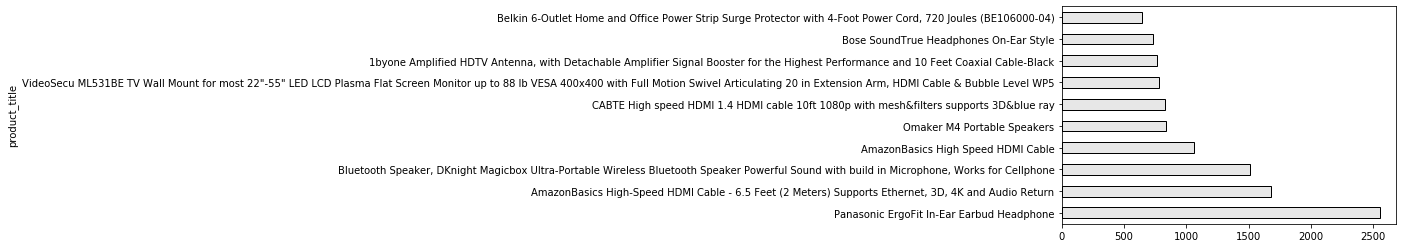

In [3]:
df.groupby(['product_title'])['star_rating'].sum().sort_values(ascending=False).head(10).plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='black');

In [6]:
df['product_title'].value_counts().head(10)

Panasonic ErgoFit In-Ear Earbud Headphone                                                                                                                                                               574
Bluetooth Speaker, DKnight Magicbox Ultra-Portable Wireless Bluetooth Speaker Powerful Sound with build in Microphone, Works for Cellphone                                                              357
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (2 Meters) Supports Ethernet, 3D, 4K and Audio Return                                                                                                     352
AmazonBasics High Speed HDMI Cable                                                                                                                                                                      226
1byone Amplified HDTV Antenna, with Detachable Amplifier Signal Booster for the Highest Performance and 10 Feet Coaxial Cable-Black                                                     

# Dataset exploration and cleaning

In [7]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [8]:
df.describe()

customer_id  product_parent   star_rating  helpful_votes   total_votes
count  5.099900e+04    5.099900e+04  50999.000000   50999.000000  50999.000000
mean   2.535841e+07    5.033769e+08      4.094100       0.796545      1.056432
std    1.647393e+07    2.884883e+08      1.386215      15.821417     16.977340
min    1.092200e+04    2.766400e+04      1.000000       0.000000      0.000000
25%    1.201085e+07    2.510831e+08      4.000000       0.000000      0.000000
50%    2.347650e+07    4.967973e+08      5.000000       0.000000      0.000000
75%    4.113681e+07    7.572922e+08      5.000000       0.000000      1.000000
max    5.309636e+07    9.999911e+08      5.000000    2506.000000   2720.000000

In [9]:
# Drop columns

In [10]:
re = df.drop(['marketplace',  'review_id', 'product_id',
       'product_parent',  'product_category',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'], axis=1)

In [11]:
re.head(2)

customer_id                                      product_title  star_rating
0     41409413  yoomall 5M Antenna WIFI RP-SMA Female to Male ...            5
1     49668221         Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor            5

In [12]:
re.isnull().sum()

customer_id      0
product_title    0
star_rating      0
dtype: int64

In [13]:
re.shape

(50999, 3)

In [14]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    50999 non-null  int64 
 1   product_title  50999 non-null  object
 2   star_rating    50999 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [15]:
re['star_rating'].value_counts()

5    31333
4     7571
1     5852
3     3508
2     2735
Name: star_rating, dtype: int64

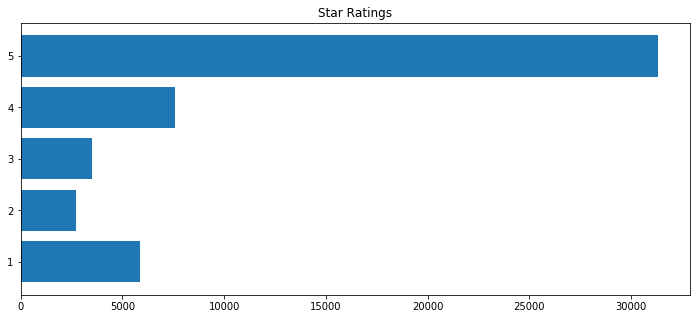

In [16]:
plt.figure(figsize = (12, 5))
plt.barh([5, 4, 1, 3, 2], 
        re['star_rating'].value_counts()) #by adding hafter bar we can change the direction

# Add a title and show the plot.
plt.title('Star Ratings');


# Recommender System

- Based on recommended featues
- Based on collaborative user based -ratings
- Based on collaborative user based -similar purchases
- Based on collaborative user based -ratings/similar purchases

# item-based collaborative recommender ratings 

In [17]:
ratings = pd.DataFrame(df.groupby('product_title')['star_rating'].mean())
ratings.head(2)

star_rating
product_title                                                  
#1 BEST SELLING Waterproof Bluetooth Speaker wi...     4.769231
#1 Universal TV Box Mount Holder Mounting Brack...     5.000000

In [18]:
ratings['rating_number'] = df.groupby('product_title')['star_rating'].count()
ratings.head()

star_rating  rating_number
product_title                                                                 
#1 BEST SELLING Waterproof Bluetooth Speaker wi...     4.769231             13
#1 Universal TV Box Mount Holder Mounting Brack...     5.000000              1
#364 Renata Watch Batteries 2Pcs                       4.000000              1
#394 Renata Watch Batteries 2Pcs                       3.000000              2
%Original Superlux HD668B Semi-open Dynamic Ste...     4.100000             10

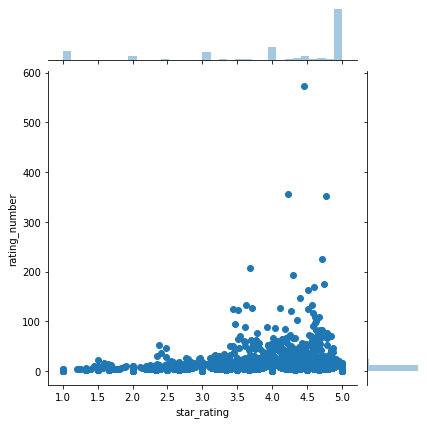

In [19]:
sns.jointplot(x='star_rating', y='rating_number', data =ratings)

In [20]:
pivot = pd.pivot_table(re, index='product_title', columns='customer_id', values='star_rating')
pivot

customer_id                                         10922     12683     \
product_title                                                            
#1 BEST SELLING Waterproof Bluetooth Speaker wi...       NaN       NaN   
#1 Universal TV Box Mount Holder Mounting Brack...       NaN       NaN   
#364 Renata Watch Batteries 2Pcs                         NaN       NaN   
#394 Renata Watch Batteries 2Pcs                         NaN       NaN   
%Original Superlux HD668B Semi-open Dynamic Ste...       NaN       NaN   
...                                                      ...       ...   
xDuoo TA-03 XMOS WM8740 24Bit/192KHz USB DAC 12...       NaN       NaN   
yoomall 5M Antenna WIFI RP-SMA Female to Male E...       NaN       NaN   
zebest okcharger902 House Wall Power Charger Co...       NaN       NaN   
{Waterproof Sports Speaker}, Wireless Mini Smar...       NaN       NaN   
★ The Ultimate Bundle - 7 Pack of Premium Micro...       NaN       NaN   

customer_id                                         14292     14435     \
product_title                                                            
#1 BEST SELLING Waterproof Bluetooth Speaker wi...       NaN       NaN   
#1 Universal TV Box Mount Holder Mounting Brack...       NaN       NaN   
#364 Renata Watch Batteries 2Pcs                         NaN       NaN   
#394 Renata Watch Batteries 2Pcs                         NaN       NaN   
%Original Superlux HD668B Semi-open Dynamic Ste...       NaN       NaN   
...                                                      ...       ...   
xDuoo TA-03 XMOS WM8740 24Bit/192KHz USB DAC 12...       NaN       NaN   
yoomall 5M Antenna WIFI RP-SMA Female to Male E...       NaN       NaN   
zebest okcharger902 House Wall Power Charger Co...       NaN       NaN   
{Waterproof Sports Speaker}, Wireless Mini Smar...       NaN       NaN   
★ The Ultimate Bundle - 7 Pack of Premium Micro...       NaN       NaN   

customer_id                                         15844     15937     \
product_title                                                            
#1 BEST SELLING Waterproof Bluetooth Speaker wi...       NaN       NaN   
#1 Universal TV Box Mount Holder Mounting Brack...       NaN       NaN   
#364 Renata Watch Batteries 2Pcs                         NaN       NaN   
#394 Renata Watch Batteries 2Pcs                         NaN       NaN   
%Original Superlux HD668B Semi-open Dynamic Ste...       NaN       NaN   
...                                                      ...       ...   
xDuoo TA-03 XMOS WM8740 24Bit/192KHz USB DAC 12...       NaN       NaN   
yoomall 5M Antenna WIFI RP-SMA Female to Male E...       NaN       NaN   
zebest okcharger902 House Wall Power Charger Co...       NaN       NaN   
{Waterproof Sports Speaker}, Wireless Mini Smar...       NaN       NaN   
★ The Ultimate Bundle - 7 Pack of Premium Micro...       NaN       NaN   

customer_id                                         17106     21238     \
product_title                                                            
#1 BEST SELLING Waterproof Bluetooth Speaker wi...       NaN       NaN   
#1 Universal TV Box Mount Holder Mounting Brack...       NaN       NaN   
#364 Renata Watch Batteries 2Pcs                         NaN       NaN   
#394 Renata Watch Batteries 2Pcs                         NaN       NaN   
%Original Superlux HD668B Semi-open Dynamic Ste...       NaN       NaN   
...                                                      ...       ...   
xDuoo TA-03 XMOS WM8740 24Bit/192KHz USB DAC 12...       NaN       NaN   
yoomall 5M Antenna WIFI RP-SMA Female to Male E...       NaN       NaN   
zebest okcharger902 House Wall Power Charger Co...       NaN       NaN   
{Waterproof Sports Speaker}, Wireless Mini Smar...       NaN       NaN   
★ The Ultimate Bundle - 7 Pack of Premium Micro...       NaN       NaN   

customer_id                                         22000     23251     ...  \
product_title                                                        

In [21]:
pivot.shape

(15961, 44031)

In [22]:
ratings.sort_values('rating_number', ascending=False).head(3)

star_rating  rating_number
product_title                                                                 
Panasonic ErgoFit In-Ear Earbud Headphone              4.458188            574
Bluetooth Speaker, DKnight Magicbox Ultra-Porta...     4.229692            357
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (...     4.775568            352

# Sparse matrix

In [23]:
sparse_pivot = sparse.csr_matrix(pivot.fillna(0))
print(sparse_pivot)

  (0, 4436)	5.0
  (0, 11260)	5.0
  (0, 14918)	5.0
  (0, 19744)	5.0
  (0, 19919)	4.0
  (0, 22462)	5.0
  (0, 26359)	5.0
  (0, 26477)	4.0
  (0, 33401)	5.0
  (0, 34649)	5.0
  (0, 39368)	5.0
  (0, 41697)	5.0
  (0, 41888)	4.0
  (1, 31244)	5.0
  (2, 16528)	4.0
  (3, 4674)	5.0
  (3, 12466)	1.0
  (4, 3355)	5.0
  (4, 4528)	3.0
  (4, 4931)	5.0
  (4, 5626)	5.0
  (4, 6291)	5.0
  (4, 7141)	4.0
  (4, 7558)	3.0
  (4, 12878)	3.0
  :	:
  (15959, 469)	4.0
  (15959, 2397)	2.0
  (15959, 4817)	4.0
  (15959, 6665)	5.0
  (15959, 6689)	5.0
  (15959, 6737)	5.0
  (15959, 6787)	5.0
  (15959, 6837)	5.0
  (15959, 7989)	3.0
  (15959, 12147)	5.0
  (15959, 15388)	5.0
  (15959, 17809)	5.0
  (15959, 18888)	5.0
  (15959, 19899)	5.0
  (15959, 19912)	5.0
  (15959, 21999)	5.0
  (15959, 25226)	3.0
  (15959, 32997)	5.0
  (15959, 39713)	5.0
  (15959, 43764)	2.0
  (15960, 5203)	4.0
  (15960, 5286)	5.0
  (15960, 6558)	5.0
  (15960, 9605)	5.0
  (15960, 33437)	5.0


In [24]:
sparse_pivot.shape

(15961, 44031)

# calculate Pairwise Distance

In [25]:
recommender = pairwise_distances(sparse_pivot, metric= 'cosine')


In [26]:
#create distance dataframe
recommender_df = pd.DataFrame(recommender, columns=pivot.index, index=pivot.index)
recommender_df

product_title                                       #1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.  \
product_title                                                                                                                                                                                                                                                                                                                                          
#1 BEST SELLING Waterproof Bluetooth Speaker wi...                                                0.0                                                                                                                                                                                                                                                  
#1 Universal TV Box Mount Holder Mounting Brack...                                                1.0                                                                                                                                                                                                                                                  
#364 Renata Watch Batteries 2Pcs                                                                  1.0                                                                                                                                                                                                                                                  
#394 Renata Watch Batteries 2Pcs                                                                  1.0                                                                                                                                                                                                                                                  
%Original Superlux HD668B Semi-open Dynamic Ste...                                                1.0                                                                                                                                                                                                                                                  
...                                                                                               ...                                                                                                                                                                                                                                                  
xDuoo TA-03 XMOS WM8740 24Bit/192KHz USB DAC 12...                                                1.0                                                                                                                                                                                                                                                  
yoomall 5M Antenna WIFI RP-SMA Female to Male E...                                                1.0                                                                                                                                                                                                                                                  
zebest okcharger902 House Wall Power Charger Co...                                                1.0                                                                                                                                                                                                                                                  
{Waterproof Sports Speaker}, Wireless Mini Smar...                                                1.0                                                                                                                   

In [27]:
recommender_df.shape

(15961, 15961)

# Evaluate recommender performance

In [28]:
re.head(5)

customer_id                                      product_title  star_rating
0     41409413  yoomall 5M Antenna WIFI RP-SMA Female to Male ...            5
1     49668221         Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor            5
2     12338275        Channel Master Titan 2 Antenna Preamplifier            5
3     38487968  LIMTECH Wall charger + USB Hotsync & Charging ...            1
4     23732619     Skullcandy Air Raid Portable Bluetooth Speaker            5

In [29]:
items ={}

for title in re['product_title'].unique():


    for product_title in re.loc[re['product_title'].str.contains(title), 'product_title'].unique():
        print(product_title)
        print('Average rating', pivot.loc[product_title, :].mean())
        print('Number of ratings', pivot.T[product_title].count())
        print('')
        print('closest items')
        print(recommender_df[product_title].sort_values(ascending=True)[1:11])
        print('')
        print('----------------------------------------------------------------------')
        print('')
    items[title] = recommender_df[product_title].sort_values().index.tolist()[1:11]
    


yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable
Average rating 4.0
Number of ratings 4

closest items
product_title
Monoprice Marker Cable Tie 4 inch 18LBS, 100pcs/Pack - White                                                                                                                                                                                                                                        0.791107
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                  

Average rating 4.0
Number of ratings 6

closest items
product_title
Earpads, ear pads, ear cushion Replacement for headset, Compatible with Sennheiser HD205, HD 215, HD225, Audio-Technica ATH-T2, Pro700, Sony MDR-V500D, MDR-V700, MDR-V700DJ, MDR-2700, etc. (Packaged 1 pair (2 pieces)) T024    0.509710
High Quality AC Adapter 36-Watt for Asus Eee PC 1000HA 1000HE 1002HA                                                                                                                                                              0.509710
Denon AH-C260 Acoustic Luxury In-Ear Headphones (Black)                                                                                                                                                                           0.509710
Sony MDR-W24V Vertical In-The-Ear Headphones                                                                                                                                                                                      0

C:\Users\alirodqui\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


JVC HAFR201A Xtreme Xplosive Deep Bass Earbuds with Mic and Remote, Blue
Average rating 3.5714285714285716
Number of ratings 7

closest items
product_title
JVC HAFX1X Headphone Xtreme-Xplosivs                                                                                                                                                                                                                                                                0.828303
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                         

Name: Coby 8 GB 1.8-Inch Video MP3 Player with FM Radio, dtype: float64

----------------------------------------------------------------------

Kingvom 8gb 50 Hours Continuous Playback Mp3 Player with Bluetooth Transmitter Hi-fi Music Player White
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Contr

StarTech.com Mini USB 2.0 Cable
Average rating 4.285714285714286
Number of ratings 7

closest items
product_title
Mount-It! Low Profile TV Mount for 42~70" Plasma & LCD                                               0.799397
APC Wall Tap Surgearrest Essential P6WU2                                                             0.877227
SENNHEISER Headphones                                                                                0.886223
Sewell Direct SW-29863-12 Deadbolt Banana Plugs, 12-Pair                                             0.930339
AmazonBasics High Speed HDMI Cable                                                                   0.976615
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.000000
Pyle H

Anker 60W 6-Port USB Wall Charger, PowerPort 6 for iPhone X/ 8/ 7 / 6s / Plus, iPad Pro / Air 2 / mini/ iPod, Galaxy S7 / S6 / Edge / Plus, Note 5 / 4, LG, Nexus, HTC and More
Average rating 4.428571428571429
Number of ratings 7

closest items
product_title
WELOYA Solderless Flexible Breadboard Jumper Wires M/M 130pcs                                                                                                                                                                                                                                       0.593106
Foxnovo Female Wire Cables 40-pin Male to Male /Female to Female /Male to Female Breadboard Jumper Wires Ribbon Cables Kit 3pcs/lots                                                                                                                                                                0.593106
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust

Griffin Griffin Twenty 2.1 Bluetooth Receiver for iPhone and Android - Bluetooth or optical audio streaming to your speakers
Average rating 4.0
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                          

Status Audio HD One Headphones - Noise isolating. Matte finish. Foldable. 2 cables. Mic.
Average rating 4.428571428571429
Number of ratings 14

closest items
product_title
Sentey LS-7501 Universal Black Carrying Case for Foldable Headphones with metal zipper, Eva Rubber, Dual Compartments, compatible with Most Foldable Headphones, Inner Dimensions 6.75 x 5 x 3.5 inches                                                                                             0.856022
NX-NAXA Electronics Portable AM FM CD MP3 USB Cassette                                                                                                                                                                                                                                              0.965331
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume,

Sony MDRZX110 Noise Cancelling Headphones
Average rating 4.545454545454546
Number of ratings 11

closest items
product_title
Bluelounge Cablebox Boîte de Rangement Ignifugé                                                                                                                                                                                                                                                     0.934637
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                    

8 Pack Panasonic NiMH AAA Rechargeable Battery for Cordless Phones
Average rating 4.444444444444445
Number of ratings 18

closest items
product_title
Photive PH-EB100 Sweat-Proof Wireless Bluetooth 4.1 Stereo Earbuds with Built in Microphone (Black)                                                                                                                                                                                                 0.935472
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                           

Lastest Apple TV 4 - Apple TV 4th Generation Wall Mount 2015
Average rating 4.75
Number of ratings 4

closest items
product_title
Tzou Matte Zipper Earphones Carrying Case for Beats Monster by Dr.Dre Studio, Solo Wireless, Solo, Solo HD Over-ear Headphone Replacement Case Pouch Bag Box                                                                                                                                        0.741930
Pyle Volume Control In-Wall Pyle Pro; Rotary Style                                                                                                                                                                                                                                                  0.749412
BAFX Products® - IR Repeater Kit / Remote Control Extender (Single or Triple Zone)                                                                                                                                                                                          

VideoSecu Full Motion Articulating Tilt TV Wall Mount Bracket
Average rating 4.52054794520548
Number of ratings 73

closest items
product_title
RCA ANT1450BF Multi-Directional Digital Flat Amplified HDTV Antenna-Black                                                               0.873245
Samson C03U Recording/ Podcasting Pak                                                                                                   0.873245
Supersonic SC602 High Definition HDTV and Digital TV Wall Mount Indoor Antenna                                                          0.873245
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                       0.873245
Atlantic Onyx 1248 80 CD Tower (Matte Black Steel)                                                                                      0.873245
Levin UC-0006 4 Outlet Home/Office Smart Charger with 4 AC Plugs and 4 USB Charger Ports, 5 Feet - Black                           

Average rating 2.3333333333333335
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Ster

Number of ratings 14

closest items
product_title
Outdoor Amplified HDTV/UHF/VHF Antenna w/ Remote Control - 360 Degree Motorized Rotation Kit - INCLUDES 20 Inch J-Pole Outdoor Heavy Duty Roof Mount                                                                                                                                                0.762871
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Spea

JBL Charge Portable Wireless Bluetooth Speaker
Average rating 4.181818181818182
Number of ratings 11

closest items
product_title
Case Star ® Black Earphone handsfree headset HARD EVA Case Bag - Clamshell/MESH Style with Zipper Enclosure, Inner Pocket, and Durable Exterior + Black Small Climbing Carabiner with Case Star Velvet Bag (EVA Earphone Case (Flat) - Black)    0.661357
JBL J33 Premium Headphones                                                                                                                                                                                                                       0.767693
Case Star Clamshell Style Black PU leather Earphone Earbuds Case with Silver Climbing Carabiner and Case Star Cellphone Bag                                                                                                                      0.788452
Philips SHS3200WT/37 Flexible Earhook Headphones White                                                                  

Skullcandy Hesh Bluetooth
Average rating 4.28125
Number of ratings 32

closest items
product_title
NiceTQ Replacement 4FT 3.5MM Stereo Audio Cable Cord With Mic For Skullcandy Hesh 2 Headphones                         0.799357
Esky174; HG-831 Remote-controlled Multi Directional UHF/VHF Outdoor HDTV Antenna                                       0.839486
Ambient Weather KL-1000 Replacement Battery                                                                            0.839486
Sony Bluetooth and Noise Cancelling Headset                                                                            0.936551
Bluedio 1566998 H Plus Turbine Wireless Bluetooth 4.1 Stereo Headphones with Mic/Micro SD Card Slot/FM Radio, Black    0.940400
Bose Wave FM Antenna                                                                                                   0.947195
Bose 343178-1110 Wave Music System III                                                                                 0.951951
Amazo

JAM XT Extreme Wireless Speaker
Average rating 4.545454545454546
Number of ratings 11

closest items
product_title
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output               1.0
Pyle Home PDPC52 5.25-Inch In-Ceiling 2-Way Flush Mount Enclosure Speaker System with Transformer    1.0
Pyle Home PDWR40B 5.25-Inch Indoor/Outdoor Wa

ECHOGEAR Full Motion Articulating TV Wall Mount Bracket for most 37-70 inch LED, LCD, OLED and Plasma Flat Screen TVs w/ VESA patterns up to 600 x 400 - 16" Extension - EGLF1-BK
Average rating 4.788461538461538
Number of ratings 52

closest items
product_title
Pyle Home Theater Preamplifier Receiver, Audio/Video System, CD/DVD Player, AM/FM Radio, MP3/USB Reader, 1000 Watt    0.856082
RAYSUN Gold Plated 3.5mm Male to 6.35mm Female Stereo Adapter 3.5mm to 1/4" Audio Adapter                             0.856082
DIZA100 HDMI Adapter Male to Female Right Angle                                                                       0.898234
Eton FRX5 Hand Crank Emergency Weather Radio                                                                          0.941049
Mediabridge Toslink Cable - Optical Digital Audio Cable                                                               0.965888
Datacomm Electronics 45-0008-WH Easy Mount Recessed Low Voltage Cable Plate                             

Omaker M4 Portable Speakers
Average rating 4.304123711340206
Number of ratings 194

closest items
product_title
ARECORD Car Charger                                                                                                                                                0.919260
Electrified Brand New Replacement BULB ONLY For Mitsubishi WD82740 TV'S                                                                                            0.919260
FlePow&trade; 2 Pack 18650 Lithium-ion Rechargeable Batteries (Button Top) 3.7V 2600mAh Rechargeable Li-ion Flashlight Batteries with Protected PCB Board          0.919260
Lutema 915B455011-E Mitsubishi Replacement DLP/LCD Projection TV Lamp (Economy)                                                                                    0.930766
Accessory USA Replace 2A Wall Charger Power Adapter for Nextbook Premium 7 HD NX007HD8G Tablet                                                                     0.935408
Eton Rukus Bluetooth Sound S

JVC HAFR201A Xtreme Xplosive Deep Bass Earbuds with Mic and Remote, Blue
Average rating 3.5714285714285716
Number of ratings 7

closest items
product_title
JVC HAFX1X Headphone Xtreme-Xplosivs                                                                                                                                                                                                                                                                0.828303
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                         

Name: JLAB Samba Travel Case for JBuds J2 Earbuds, dtype: float64

----------------------------------------------------------------------

USA Seller,buyit®best Premium Universal Earbuds with on Sale with Mic and Volume Control for Apple Iphone 5/6 Ipod Tv Stereo Quality and Cheap Earphones Headphones Headset
Average rating 1.0
Number of ratings 2

closest items
product_title
Bluetooth Speaker ,CINEYO(TM) Ultra-Portable Wireless Bluetooth Speakers,Powerful Sound with build in Microphone,                                                                                                                                                                                   0.751854
Photive PH-EB100 Sweat-Proof Wireless Bluetooth 4.1 Stereo Earbuds with Built in Microphone (Black)                                                                                                                                                                                                 0.964422
#1 BEST SELLING Wat

Number of ratings 2

closest items
product_title
KabelDirekt 506 RCA Extension Cable ( RCA Male to RCA Female) - PRO Series                                                                                                                                 0.292893
SOWND Audio A106G Premium Gold w/ Black Accents Bullet In-ear Noise-isolating Sports Earbuds w/Mic                                                                                                         0.292893
UB+ Eupho Portable Bluetooth Speaker with Expansion Casing Bundle - Warm Grey - Modular                                                                                                                    0.447842
Headphones, Sound Intone I68 Foldable Headphones with Microphone and Volume Control, Stereo Headset for Kids/ Adults, Compatible for iPhone, iPod, iPad, Samsung , HTC, MP3/4, Earphones (Black/orange)    0.500000
KabelDirekt (1 foot) Headset Extension Cable ( 3.5mm male to 3.5mm female)                             

Average rating 3.7
Number of ratings 10

closest items
product_title
Zeiss Pre-moistened Lens Cloths Wipes to Clean Eyeglasses, Cell Phones, Cameras and much more. 100 individually wrapped wipes                                                                                                                                                                       0.608370
Sony MDRE9LP Earbud Headphones                                                                                                                                                                                                                                                                      0.983949
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPho

Number of ratings 2

closest items
product_title
Hewlett Packard 16X 4.7GB DVD+R 100pk Spindle (Discontinued by Manufacturer)                                                                                                                                                                                                                        0.292893
Peerless SF640P Universal Fixed Low-Profile Wall Mount for 32" - 50" Displays (Black/Non-Security)                                                                                                                                                                                                  0.292893
C&E CNE531793 High-Speed HDMI Extension Cable Male, Female, 50', Pack of 4                                                                                                                                                                                                                          0.651845
VoiceBooster Voice Amplifier & Mp3 Player 16watt

Number of ratings 5

closest items
product_title
Panasonic RP-HS16-K In-Ear Earbud Heaphones with Flexible Ear Hinge (Black)                                                                                                                                                                                                                         0.780938
Sony MDRAS200 Active Sports Headphones                                                                                                                                                                                                                                                              0.803533
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speak

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

Name: MAXROCK TM Mini Total Soft Silicone Earbuds Headphones with Mic Music Sleep Choice for Cellphones Ipad Tablet Mp3 Laptop and Most 3.5mm Audio Player, dtype: float64

----------------------------------------------------------------------

FSL Xylem Wood Earbuds with Microphone and Remote - Corded Headset
Average rating 2.5
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini

Name: Symphonized NRG Premium Genuine Wood In-ear Noise-isolating Headphones|Earbuds|Earphones with Microphone (Turquoise Blue), dtype: float64

----------------------------------------------------------------------

Jeecoo ED1 Metal Earbuds In-ear Headphones with Microphone for Cell Phone
Average rating 3.9523809523809526
Number of ratings 21

closest items
product_title
CycleMore Motorcycle Mobile Splashproof Waterproof 2 USB Power Supply Port Socket Charger                                                                                                                                                                                                           0.733877
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stere

Name: Earbuds, Alpatronix EX100 Universal 1-Button High Performance Stereo In-Ear Headset with Built-in Mic, Tangle-Free Noise Isolating Earphones for Smartphones, Computers, Tablets & Laptops, dtype: float64

----------------------------------------------------------------------

The Macbeth Collection Earbuds with Mic for iPhone 4/4S
Average rating 4.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Py

Number of ratings 8

closest items
product_title
Philips ActionFit Sports Earhook Headphones                                                                                                                                                                                                                                                         0.917715
Jarv NMotion Sport Wireless Bluetooth 4.0 Stereo Earbuds/Headphones with In-Line Microphone , Black                                                                                                                                                                                                 0.961587
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speak

Number of ratings 2

closest items
product_title
Case Star ® Black Earphone handsfree headset HARD EVA Case Bag - Clamshell/MESH Style with Zipper Enclosure, Inner Pocket, and Durable Exterior + Black Small Climbing Carabiner with Case Star Velvet Bag (EVA Earphone Case (Flat) - Black)                                                       0.375305
JBL J33 Premium Headphones                                                                                                                                                                                                                                                                          0.571463
JBL Charge Portable Wireless Bluetooth Speaker                                                                                                                                                                                                                                                      0.788452
Panasonic ErgoFit In-Ear Earbud Headphone       

Average rating 4.285714285714286
Number of ratings 7

closest items
product_title
Black & Decker 905080-11 Battery                                                                                                                                                                                                                                                                    0.580409
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000000
Pyle Home Mini 

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Average rating 4.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Name: 10qty - Black Double Flange Replacement Silicone Earbuds (Fits Beats2 Wireless) 4.1mm Connector, dtype: float64

----------------------------------------------------------------------

Frends Ella B Earbuds Headphones in Gold and White (Non-retail Packaging)
Average rating 3.0
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio 

Number of ratings 1

closest items
product_title
Mediabridge Coaxial Cable (100 Feet) with F-Male Connectors - Ultra Series - Tri-Shielded UL CL2 In-Wall Rated RG6 Digital Audio / Video - Includes Removable EZ Grip Caps (Part# CJ100-6BF-N1 )    0.622036
Aurum - High Speed HDMI Cable With Ethernet - …                                                                                                                                                     0.629375
AmazonBasics Digital Optical Audio Toslink Cable - 6 Feet (1.8 Meters)                                                                                                                              0.772256
Mediasonic Homeworx HW110AN Super Thin Indoor HDTV Antenna - 25 Miles Range                                                                                                                         0.883023
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                      

Number of ratings 6

closest items
product_title
Photive PH-BTE70 Wireless Bluetooth Earbuds. Sweatproof Secure Fit Headphones for Running, Gym, Exercise. 8 Hour Battery                                                                                                                                                                            0.968428
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speak

Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Number of ratings 2

closest items
product_title
Sangean DT-210 FM-Stereo/AM PLL Synthesized Pocket Receiver                                                                                                                                                                                                                                         0.629312
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifie

Name: Aluratek Hi-Fi Noise Reducing Metal Stereo Earbuds, dtype: float64

----------------------------------------------------------------------

3 Sizes S/M/L Motorola Replacement Earbuds Tips Ear Gels Bud Cushions for hd S10 S10Hd Bluetooth Stereo Headset
Average rating 3.75
Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Re

Average rating 4.0
Number of ratings 5

closest items
product_title
Sound Intone CX-05 Headphones Stereo Adjustable Folding Headsets Stretchable Headband Headset Detachable Cable 3.5mm with In-line Microphone(Black)                           0.889041
Beats Solo2 Wireless On-Ear Headphone - Red (Old Model)                                                                                                                       0.948810
Silicon Devices Wireless Bluetooth Earbuds for Running - Sports Sweatproof Workout Comfort+ Headphones                                                                        0.963415
Sony MDR-XB50BT Extra Bass Headsets                                                                                                                                           0.971559
Sentey LS-4420 Warp Black/Red Headphones with Stereo High Definition, Over-Ear, Detachable Audio Cable 3.5mm, Foldable Headphone, Powerful Bass and Carrying Bag Included.    0.980475
Pyle Home PDWR68W

Average rating 2.5
Number of ratings 2

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output                       1.0
Pyle Home PDPC52 5.25-Inch I

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output                       1.0
Pyle Home PDPC52 5.25-Inch In-Ceiling 2-Way Flu

Name: Monster 12-Piece Replacement Earbuds Eartips (Black, Medium), dtype: float64

----------------------------------------------------------------------

3 Pairs Black Medium Size in-ear Memory Foam Tips Earbuds Eartips for Sony Mdr-as-40ex Mdr-ex-32 Mdr-nc-11 Mdr-nc-22 Mdr-xb-40ex
Average rating 2.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker Syst

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Name: Bluecell 3 Pairs Black Color Large Size in-ear Memory Foam Tips Earbuds Eartips for Sony Mdr-as-40ex Mdr-ex-32 Mdr-nc-11 Mdr-nc-22 Mdr-xb-40ex by Generic, dtype: float64

----------------------------------------------------------------------

Tweedz Durable, Tangle-Free Red Earbuds - Comfortable In Ear Stereo Headphones with 100% Nylon Braided Fabric Wrapped Cords and Noise Isolating Ear Buds
Average rating 3.0
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                 

Number of ratings 2

closest items
product_title
Philips SQM6325/27 Simply Straight LCD/Plasma TV Fixed Wall Mount for Screen Size 32 Inch- 42 Inch (Discontinued by Manufacturer)                                 0.292893
E-More® Full New Unique Design IR Infrared Receiver TL 38Khz Electronics Set-Top Boxes / Car Multimedia / TV IR Receiver 1.5m Extender Cable 3.5mm Stereo Plug    0.292893
San 1                                                                                                                                                             0.809653
Sylvania SRCD243 Portable CD Player with AM/FM Radio, Boombox (Pink)                                                                                              0.888197
Pyle Home PDWR53 5.25-Inch Indoor/Outdoor Waterproof Speakers (Pair)                                                                                              1.000000
Pyle Home PDWR40B 5.25-Inch Indoor/Outdoor Waterproof Speakers (Black)                          

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                 


----------------------------------------------------------------------

aLLreLi S370 Bluetooth V4.0 Stereo Earbuds [Sports & Running & Exercise & Entertainment] In Ear Headphones Wireless Headsets w/ Microphone Universal for iPhone 6 / 6 Plus / 5S / 5 / 4S, iPod, Samsung Galaxy S6 / S6 Edge / S5, HTC One M9, and Other Bluetooth Devices (Black/Yellow)
Average rating 2.0
Number of ratings 2

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl


----------------------------------------------------------------------

C Crane Voz-P Premium Wooden Earbuds
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                                                                                                                                                  

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Name: SOWND MHMS261CA01-W 3.5mm Earphones Workout Sport Mic Earbuds, White/Black-Blue, dtype: float64

----------------------------------------------------------------------

6 Pair, Black - Medium - Replacement Earphone Cushions, Earbuds for JVC, JBL, Altec Lansing, Audio Technica, Auvio, Creative, Denon, Sony & others (See connection size details below).
Average rating 1.0
Number of ratings 1

closest items
product_title
JVC HA-EBX85-W Sports Inner Ear Clip Headphones HAEBX85                                                                                                                                                                                                                                             0.556322
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor 

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Average rating 5.0
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

Nitecore i2 2016 Intellicharger Smart Battery Charger for Li-ion IMR Ni-MH NiCd
Average rating 4.8
Number of ratings 10

closest items
product_title
Sony SSCS8 2-Way 3-Driver Center Channel Speaker, Black                                                                                                                                                                                                                                             0.673140
2pcs 18650 2500mah 20A discharge Samsung INR18650-25R li-ion power cell                                                                                                                                                                                                                             0.837381
Mediabridge 14AWG 2-Conductor Speaker Wire (100 Feet, Clear)- Spooled Design w/ Sequential Foot Markings ( SW-14X2-100-CL )                                                                                                                              

TDK Life on Record TREK Max A34 Wireless Weatherproof Speaker
Average rating 4.2727272727272725
Number of ratings 11

closest items
product_title
Klipsch 1016531 X11i Earbuds with Mic and Playlist Control for iPod/iPhone/iPad - Black/Dark Gray                                                                                                                                                                                                   0.830372
Klipsch IMAGE S4 -Ear Enhanced Bass Noise-Isolating Headphones                                                                                                                                                                                                                                      0.925403
Samsung VG-STC4000 Skype TV Camera                                                                                                                                                                                                                          

Super Antenna FG1 Frequency Guide HF SWR Ruler for MP1 ham radio amateur
Average rating 5.0
Number of ratings 1

closest items
product_title
Super Antenna FG1 Frequency Guide HF SWR Ruler for MP1 ham radio amateur                                                                                                                                                                                                                            0.0
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                              

Duracell Coppertop AA Alkaline Batteries 40 pack
Average rating 5.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output      

CyberPower PDU15M2F10R 12-Outlets 1U Rack Mount 15A Metered Power Distribution Unit Outlet Type: NEMA 5-15R
Average rating 5.0
Number of ratings 1

closest items
product_title
SONOS CONNECT:AMP Wireless Amplifier for Streaming Music                                                                                                                                                                                                                                            0.5
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                               

Bluedio HTCAW001 H-Turbine Shooting Brake Wireless Bluetooth 4.1 Stereo Over-Ear Headphones
Average rating 3.6315789473684212
Number of ratings 57

closest items
product_title
Vcall Smallest Wireless Stereo Music Bluetooth 3.0 Headset Hands-free Earphone Headphone or iPhone 6 6 plus 5s 5c 4s 4,iPad 2 3 4 New iPad, iPod, Android, Samsung Galaxy, Smart Phones Bluetooth Devices    0.833241
Polk Audio Nue Voe Headphones                                                                                                                                                                                0.833241
Listening Headphones for Kids with Volume-Limiting Technology                                                                                                                                                0.833241
Bluedio H Plus Turbine Wireless Bluetooth 4.1 Stereo Headphones with Mic/Micro SD Card Slot/FM Radio (White)                                                                          

GS Portalac PX12072HG 12V 7.5Ah Emergency Light Battery - VICI Battery Brand™ - Verizon FiOS Replacement Battery
Average rating 3.6666666666666665
Number of ratings 3

closest items
product_title
APC C20B AV C Outlet Power Filter, 120V                                                                      0.959442
Philips In-ear Headphones - Silver                                                                           0.974645
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                            

Sewell Direct SW-29870 160-Feet/50 M DV-Link, DVI Extender Over CAT5
Average rating 3.3333333333333335
Number of ratings 3

closest items
product_title
StarTech.com  Female Slim Stereo Splitter Cable                                                                                                                                                                                                                                                     0.774252
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                             

Monoprice 109203 12 Outlet Power Surge Protector with 2 Built-In USB Charger Ports, 4230 Joules
Average rating 4.5
Number of ratings 2

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier wi

Bose 343178-1110 Wave Music System III
Average rating 4.75
Number of ratings 12

closest items
product_title
Bose Wave Multi-CD Changer, Graphite Gray                                                                        0.703666
Bose Wave Multi-CD Changer, Titanium Silver (for Wave music system III)                                          0.827175
Bose Wave FM Antenna                                                                                             0.901524
Skullcandy Hesh Bluetooth                                                                                        0.951951
Pyle Home PTCDS7UI Retro Vintage Turntable with CD/MP3/Casette/Radio/USB/SD, Aux-In and Vinyl-to-MP3 Encoding    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                    1.000000
Pyle Home Professional 5 in 1 Wireless Headphone System                                                          1.000000
Pyle Home Mini 2 x 40-Watt Stereo Pow

Average rating 1.0
Number of ratings 2

closest items
product_title
Bluetooth Speaker ,CINEYO(TM) Ultra-Portable Wireless Bluetooth Speakers,Powerful Sound with build in Microphone,                                                                                                                                                                                   0.751854
Photive PH-EB100 Sweat-Proof Wireless Bluetooth 4.1 Stereo Earbuds with Built in Microphone (Black)                                                                                                                                                                                                 0.964422
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhon

Plantronics Voyager Legend Pro Bluetooth Headset w/ Voice Command Black Retail
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                        

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                     

Sterene 200-986BK-10 RG-6 Feed-Through Bushing - 10/pack
Average rating 5.0
Number of ratings 1

closest items
product_title
Sterene 200-986BK-10 RG-6 Feed-Through Bushing - 10/pack                                                                         0.000000
Directv [mrv] Swm 2 Way Splitter 2-2150 Mhz 1 Port Power Passing Weather Se [msplit2]                                            0.000000
10pcs High Frequency 3GHz F81 Barrel Connectors Couplers                                                                         0.292893
Directv SWM Approved 2-Way Wide Band Splitter MSPLIT2R0-01                                                                       0.299860
DirecTV RC66RBX RF Universal Remote                                                                                              0.422650
Directv 21 Volt Power Inserter For SWM Integrated LNB (1)                                                                        0.554565
InCover 32" Outdoor TV Cover - Water and Dust R

Nitecore Charger with EASTSHINE EB182 Battery Box and Car Charger
Average rating 4.8
Number of ratings 30

closest items
product_title
CablesOnline F-Type Female to N-Type Male Antenna RF Adapter (RF-N112)                                                                   0.811555
MPD Digital RG58U-SO239-SMA-FEMALE-1 RG-58 Jumper/Adapter for UHF Base and Mobile Antennas SMA Female to UHF SO-239 Female Connectors    0.838410
16 x Rayovac AA Recharge PLUS 2400 mAh Rechargable NiMH Batteries w/ free battery holders (16 AA batteries) packaging may vary           0.884020
12 Pack of 3.7V 5000mAH 18650 Rechargeable Li-ion Battery Yellow                                                                         0.921207
Storacell by Powerpax AA 12-Pack Battery Caddy, Yellow                                                                                   0.923068
Nitecore i2 2016 Intellicharger Smart Battery Charger for Li-ion IMR Ni-MH NiCd                                                        

Photive PH-BTE70 Wireless Bluetooth Earbuds. Sweatproof Secure Fit Headphones for Running, Gym, Exercise. 8 Hour Battery
Average rating 4.125
Number of ratings 56

closest items
product_title
iBeats Headphones with ControlTalk From Monster - In-Ear Noise Isolation                                                                             0.907197
CD/DVD Storage Case, Holds 150 Discs                                                                                                                 0.950002
Jarv NMotion PRO Sport Wireless Bluetooth 4.0 Stereo Earbuds with Built in Microphone - Red (Up to 5 hours of playtime)                              0.968428
urBeats In-Ear Headphone - White                                                                                                                     0.977358
Comply Foam Premium Earphone Tips - Isolation T-100 (Black, 3 Pairs, Large)                                                                          0.978754
SONY MDR-EX100AP I

AXESS SPBT1031 Portable Bluetooth Indoor/Outdoor 2.1 Hi-Fi Cylinder Loud Speaker with Built-In 3" Sub and SD Card, USB, AUX Inputs in Black
Average rating 4.0
Number of ratings 6

closest items
product_title
4pcs Ultrafire 18650 3000 mAh 3.7V Li-ion Rechargeable Battery                                       0.994889
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.000000
Pyle Home PD450A Profe

SENNHEISER Headphones
Average rating 3.8095238095238093
Number of ratings 21

closest items
product_title
Philips SHS8105A/28 Ear-Hook Headset for Android                                                                                                                                                                                                                                                    0.728837
JacobsParts 3.5MM Coiled Stereo Audio Cable, Gold Plated (3 FT Stretched Length)                                                                                                                                                                                                                    0.728837
StarTech.com Mini USB 2.0 Cable                                                                                                                                                                                                                                                                     

Onh Low Noise HDTV Antenna Amplifier Signal High Gain Booster for TV HDTV Antenna with USB Power Supply 15 Miles boost Range and 20dB high Signal
Average rating 4.0
Number of ratings 3

closest items
product_title
Sunydeal Tilt Swivel Two Arm Strong TV Wall Mount Bracket for Samsung Vizio Sony TCL LG 30 32 39 42 43 46 50 55 60 inch Plasma LCD LED Flat Panel Smart TV                                                                                                                                          0.292893
Onh Amplified hdtv antenna indoor 50 mile long range best hdtv antennas for home digital tv leaf flat booster mini signal booster converter,with reviews 1 Year Warranty                                                                                                                            0.646447
August Portable Dightal TV Antenna                                                                                                                                                      

Number of ratings 14

closest items
product_title
China Made Sports Stereo Wireless Bluetooth 3.0 Headset Earphone -RED                                                                                                                                                                                                                               0.552786
Portta N3C100C Mini HDMI to 3RCA Composite AV Converter for TV/PC/PS3/Blue-ray DVD1080P,White / Black                                                                                                                                                                                               0.935450
Cheetah Mounts ALAMB Articulating Arm (15” Extension) TV Wall Mount Bracket for 12-24” TVs and Displays up to VESA 100 and up to 40lbs, Including a 10’ Twisted Veins HDMI Cable                                                                                                                    0.947295
#1 BEST SELLING Waterproof Bluetooth Speaker wi

RHA Noise Isolating In-Ear Headphone
Average rating 5.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                             

Average rating 3.2333333333333334
Number of ratings 30

closest items
product_title
Ankit Berry Buds Ergonomic Noise Isolating Earphones                                                                                                                                                                                                                                                0.798738
8 Pack Panasonic NiMH AAA Rechargeable Battery for Cordless Phones                                                                                                                                                                                                                                  0.935472
USA Seller,buyit®best Premium Universal Earbuds with on Sale with Mic and Volume Control for Apple Iphone 5/6 Ipod Tv Stereo Quality and Cheap Earphones Headphones Headset                                                                                                                         0.964422
Bluetooth Spe

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Name: JVC- Basic Gumy Earbuds, dtype: float64

----------------------------------------------------------------------

Sennheiser Twist-To-Fit Stereo Sport Earbuds
Average rating 2.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                               

product_title
Trust New Rechargeable NiMH Battery AA AAA High Capacity USB Charger                                         0.626282
Memorex 2702 Personal Cassette Player                                                                        0.658844
Sylvania Personal Compact CD Player                                                                          0.762689
plug                                                                                                         0.914353
Pyle Home PT980AUH 7.1-Channel 350 Watts AM/FM Radio with USB/SD Card and HDMI Amplifier Receiver            1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Am

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Name: JLab JBuds J5M Metal Earbuds Style Headphones (Prism Purple / Black) (Discontinued by Manufacturer), dtype: float64

----------------------------------------------------------------------

Trendwoo Runner X9 Bluetooth Earphone Aluminum Headphone Wireless Earbuds (Bluetooth 4.0 Stereo Sound Built-in Mic Sweat proof)-Red
Average rating 4.666666666666667
Number of ratings 3

closest items
product_title
Bluetooth Speakers, Trendwoo 10W Powerful Portable Wireless Stereo Speaker Waterproof with Carrying Handle ( Dual 5W Drivers, 10Hours Playtime, Built in Microphone) for Outdoor & Indoor (Blue)    0.472250
Trendwoo Outdoor Bicycle Bluetooth Speakers Waterproof Rechargeable LED Flashlight with Bike Mount for Cycling Hiking Camping (Blue)                                                                0.615527
Bingoo I810 2015 New Stereo In-Ear Earphones Earbuds with In-Line Volume Control and Mic for MP3/ MP4/ Most Smartphone                                                               

Name: JLab Epic Bluetooth 4.0 Wireless Sports Earbuds with 10 Hour Battery and IPX4 Waterproof Rating, Black, dtype: float64

----------------------------------------------------------------------

Silicon Devices Bluetooth Headphones, Sports Wireless Earbuds-Workout Earphones for Running, Premium Carrying Case, Black & Green
Average rating 3.6875
Number of ratings 16

closest items
product_title
Onyx Cube Wireless Bluetooth Speaker - Ultra Portable and Superior Crisp HD Sound Quality - SIRI and NFC Functionality with iPhone and Samsung Galaxy - Enjoy Your Music Care Free with Upto 14 Hours Playback Time    0.821471
Tomameri Purple Color Portable MP4 Player MP3 Player Video Player with Photo Viewer , E-Book Reader , Voice Recorder + 16 GB Micro SD Card                                                                             0.837026
Silicon Devices Wireless Bluetooth Earbuds for Running - Sports Sweatproof Workout Comfort+ Headphones                                                  

Name: Acctrend Earphones Headphones Earbuds Sport Headphones 3.5mm Ae3-sc In-ear with Microphone Volume Adjustment Super-buss Deep Beats High Fidelity Black, dtype: float64

----------------------------------------------------------------------

Panasonic RP-HJC120 Earbuds w/iPhone controller
Average rating 5.0
Number of ratings 1

closest items
product_title
Panasonic ErgoFit In-Ear Earbud Headphone                                                                                                                                                                                                                                                           0.95415
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.00000
Pyle Home 3.5mm Jack Wireless Bluetoot

Average rating 3.0
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power A

product_title
G.G.Martinsen 32 GB Mini Usb Port Slim Small Multi-lingual Selection 1.78 LCD Portable Mp3/Mp4, Mp3Player , Mp4Player , Video Player , Music Player , Media Player , Audio player With Photo Viewer , E-book Reader , Voice Recorder, Games & Movie-Red    0.651950
Philips In-ear Headphones - Silver                                                                                                                                                                                                                         0.839325
Braven BRAVEN 805 Wireless HD Bluetooth Speaker -Black - Speakers - Retail Packaging                                                                                                                                                                       0.865071
Pwr+® 14 Ft +/-18V AC Adapter Charger for Bose SoundDock Series 2, 3, II, III, 310583-1130, 310583-1200 Digital Music System PCS36W-208 Wireless Speaker Power Supply Cord (Does Not Fit Soundlink)           

Name: 3 Pairs Replacement Silicone Earbuds Tips for Bose, dtype: float64

----------------------------------------------------------------------

Case Star ® Case Star ® Light Blue Rectangle Shaped Hard Earphone Headset EVA Case for MP3/MP4 Bluetooth Earphone Earbuds with Mesh Pocket, Zipper Enclosure, and Durable Exterior with Case Star Velvet Bag
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                

Name: Pine Technology New Design High Quality Earphones, Earpods, Earbuds with Remote Control and Microphone Compatible with all Apple Devices (White) asd1, dtype: float64

----------------------------------------------------------------------

BASN in-ear Headphones with Microphone Earbuds Flat Cable Tangle Free Earphones Play Control Volume Control for Apple iPhone
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                             

Name: V-MODA Bass Freq Earbuds, dtype: float64

----------------------------------------------------------------------

Klipsch 1016531 X11i Earbuds with Mic and Playlist Control for iPod/iPhone/iPad - Black/Dark Gray
Average rating 4.5
Number of ratings 2

closest items
product_title
Klipsch IMAGE S4 -Ear Enhanced Bass Noise-Isolating Headphones                                                                                                                                                                                                                                      0.828383
TDK Life on Record TREK Max A34 Wireless Weatherproof Speaker                                                                                                                                                                                                                                       0.830372
Samsung VG-STC4000 Skype TV Camera                                                                              

Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control     

Name: Noise Isolation HQ Metal Earbuds - Purple, dtype: float64

----------------------------------------------------------------------

Sennheiser CX 680 Earfin Sports Earbuds (Certified Refurbished)
Average rating 4.75
Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                             

Number of ratings 2

closest items
product_title
Sangean DT-210 FM-Stereo/AM PLL Synthesized Pocket Receiver                                                                                                                                                                                                                                         0.629312
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifie

Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Name: Bluetooth Headphones - Fit Acoustics Wireless Earbuds. Patented "Stays In Ears" Design. Noise cancelling with mic. Great Sport Workout Earphones. Works iPhone and Android - Amazon Orange, dtype: float64

----------------------------------------------------------------------

PLAY X STORE Wireless Bluetooth Headphone Sweatproof Sports Earhook Earbuds
Average rating 4.066666666666666
Number of ratings 15

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                          


----------------------------------------------------------------------

6pcs - (L) Large Replacement Set Earbuds Eartips for Sennheiser IE Series, CX Series, CXC Series, CXL Series, OCX Series, and MM Series In Ear Earphone Headsets
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control             

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Number of ratings 4

closest items
product_title
Wildtoad™ White Replacement Plastic Hooks and Earbuds for Lg Tone Hbs- 700, Hbs 730                          0.677413
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.000000
Pyle Ho

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

Average rating 3.0
Number of ratings 2

closest items
product_title
Etekcity 4K x 2K 4 Port High Speed HDMI Switch with IR Wireless Remote Control                                                                                                                                                                                                                      0.945774
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000000
Pyle Home Mini 2 x 40-Watt St

Name: GPX PC301B Portable CD Player with Stereo Earbuds and Anti-Skip Protection (PC301B), dtype: float64

----------------------------------------------------------------------

Xcessor Replacement Silicone Earbuds Size: MEDIUM - Parent
Average rating 5.0
Number of ratings 2

closest items
product_title
Philips SQM6325/27 Simply Straight LCD/Plasma TV Fixed Wall Mount for Screen Size 32 Inch- 42 Inch (Discontinued by Manufacturer)                                 0.292893
E-More® Full New Unique Design IR Infrared Receiver TL 38Khz Electronics Set-Top Boxes / Car Multimedia / TV IR Receiver 1.5m Extender Cable 3.5mm Stereo Plug    0.292893
San 1                                                                                                                                                             0.809653
Sylvania SRCD243 Portable CD Player with AM/FM Radio, Boombox (Pink)                                                                                              0.888197
Pyle Home 

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier           

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier           


----------------------------------------------------------------------

RevJams Active® Sport Wireless Bluetooth 4.0 Earbuds with Noise Isolation and in line microphone - White
Average rating 5.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black)

Name: CLEARANCE Earphones Plus Brand, Directional Sound Earphones, Earbuds, dtype: float64

----------------------------------------------------------------------

T.One Replacement Earbuds/Tips/Ear Gels/Bud Cushions for LG/Tone HBS-700 and Tone HBS-730/750/800 Bluetooth Stereo Headset - 20 Pieces - Assorted
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                  

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

JVC HA-EBX85-W Sports Inner Ear Clip Headphones HAEBX85
Average rating 3.625
Number of ratings 8

closest items
product_title
6 Pair, Black - Medium - Replacement Earphone Cushions, Earbuds for JVC, JBL, Altec Lansing, Audio Technica, Auvio, Creative, Denon, Sony & others (See connection size details below).    0.556322
Koss Home Headphones                                                                                                                                                                       0.921070
MEElectronics Sport-Fi M6 Noise Isolating In-Ear Headphones with Memory Wire                                                                                                               0.947654
JVC Inner Ear Sports Clip Headphone                                                                                                                                                        0.968125
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                         

Importer520 CAT/5-100FT Cat5E Patch Ethernet Network Cable 100-Feet for Pc, Mac, Laptop, Router, Ps2, Ps3, PS4, Xbox,Xbox 360, Xbox One
Average rating 3.5555555555555554
Number of ratings 9

closest items
product_title
C&E Universal Power Cord Power Cord9                                                                                                                                                                                                                                                                0.662716
Symphonized Nrg Premium Wood Noise-Isolating Headphones with Mic, White                                                                                                                                                                                                                             0.960460
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Bu

product_title
Bravo Audio Ocean Mini Valve Class A Tube Headphone Amplifier                                                                                                              0.875234
Monoprice 3.5mm Stereo Plug to 2 RCA Jack Splitter Adaptor - Gold Plated                                                                                                   0.875234
14 GA GAUGE 100 FT SPOOLS PRIMARY AUTO REMOTE POWER GROUND WIRE CABLE (4 ROLLS)                                                                                            0.875234
FitSand Travel Zipper Carrying Sleeve Soft Portable Bag Pouch Box Case Cover for Photive HYDRA Rugged Water Resistant Wireless Bluetooth Speaker                           0.875234
Pyle Home PSR6 Waterproof Shower Clock Radio                                                                                                                               0.925438
GXG-1987 WiFi Wireless OBD-II Mini OBD2 Auto Car Diagnostic Scanner Tool Adapter Reade

VinTrons Battery Replacement 37-00030-001 Tools, Battery for Magellan Maestro 3100
Average rating 4.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                    

Esky Music Fountain Dancing Colorful Water Show MP3 Speaker
Average rating 2.75
Number of ratings 12

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                     

HQRP AC Adapter / Power Supply compatible with Panasonic KX-TG7431 KX-TG7531B KX-TG7432 KX-TG7433 KX-TG7434 KX-TG7531 Cordless Phone plus HQRP Coaster
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                

Ultratech 1270 12vDC 7000mAh Battery
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Ho

Monster ILJRY-1 F Single Female RCA to Dual Male RCA Y-Adapter
Average rating 3.5
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                        

Average rating 3.0
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Name: Bluetooth Speaker, DKnight Magicbox Ultra-Portable Wireless Bluetooth Speaker Powerful Sound with build in Microphone, Works for Cellphone, dtype: float64

----------------------------------------------------------------------

Panlong  Powered Amplifier Splitter
Average rating 4.0
Number of ratings 9

closest items
product_title
Cable Matters High Speed HDMI Cable with Ethernet in White 15 Feet - 3D and 4K Resolution Ready                            0.614242
BlueRigger High Speed HDMI Cable with Ethernet (15 ft) - CL3 Rated - supports 3D and Audio Return [Latest HDMI version]    0.935991
Pyle Home PTCDS7UI Retro Vintage Turntable with CD/MP3/Casette/Radio/USB/SD, Aux-In and Vinyl-to-MP3 Encoding              1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                  1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                              1.000000
Py

2pcs 18650 2500mah 20A discharge Samsung INR18650-25R li-ion power cell
Average rating 4.2
Number of ratings 5

closest items
product_title
Nitecore i2 2016 Intellicharger Smart Battery Charger for Li-ion IMR Ni-MH NiCd                                                                         0.837381
VAlinks(TM) 5 FT 1.5m HDMI Male to 3RCA Male Extension Cable Converter Adapter for HDTV DVD Satellite TV,RGB Component video and most LCD Projectors    0.992819
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                               1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                           1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                           1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier      

Bose SoundTrue Headphones On-Ear Style
Average rating 4.50920245398773
Number of ratings 163

closest items
product_title
ARCTIC Sound Headphones P311                                                                              0.914813
Beyerdynamic DX160IE Premium In-Ear Headphones                                                            0.939763
HeadphoneMate Inline Remote and Microphone Cable for Bose QC15 QC2 and Samsung and Android Smartphones    0.948888
Bose 731670-0010 SoundSport Headphones Carry Case, Blue                                                   0.950817
Bose SoundTrue Around-Ear Headphones Carry Case                                                           0.957406
Bose SoundTrue In-Ear Headphones                                                                          0.974100
Bose SoundSport In-Ear Headphones                                                                         0.978034
Panasonic RP-BTGS10-A Premium Bluetooth Wireless Water-Resistant Open-Ear

Monster MusicConnect Portable Audio Player to Stereo Cable - 2 meter Cable (1/8 Inch stereo mini plug to RCAs) (Discontinued by Manufacturer)
Average rating 4.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                         

Number of ratings 1

closest items
product_title
Phonetone N female to F male (British standard) jack plug RF adapter                                                                                                                                                                                                                                0.0
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Average rating 4.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power A

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control     

Philips OEM PHI/334 Replacement DLP Bare Bulb for Mitsubishi 915B403001
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                               

Aweek® DE13 FM AM SW Hand Crank Dynamo Radio & Solar Powered Radio Portable Mini Fm Radio Pocket Emergency Radio World Receiver With Flashlight
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                       

Average rating 4.133333333333334
Number of ratings 15

closest items
product_title
JacobsParts 4-pin Molex Male to 2x 4-pin Molex Female Power Y-Splitter Extension Cable                                                 0.705372
MOTONG 5 FT 1.5m HDMI Male to 3RCA Male Extension Cable Converter Adapter for HDTV DVD                                                 0.795712
Portta 10HC HDMI to 3RCA Composite AV Mini Converter for TV/PC/PS3/Blue-Ray DVD 1080P, Colors May Vary(White/Black)                    0.818669
C&E Generic Premium 6' 3 RCA Audio Video Composite Cable                                                                               0.865521
Xfinity Comcast XR5 RF Remote Control X1 w/ BackLight - Version V4-U                                                                   0.888641
Aurum Ultra Series - High Speed HDMI Cable with Ethernet - Braided                                                                     0.915230
1byone Amplified HDTV Antenna, with Detachable Amplif

Wi-Fi Music Player with 3.5-Inch Color Display
Average rating 3.909090909090909
Number of ratings 33

closest items
product_title
Grace Digital ACC-IRCLI Rechargeable Battery Pack for Mondo and Mondo+                                                                                    0.703043
ABC Products® Replacement Grace Rechargeable Battery Pack for Mondo ACC-IRCLI, GDI-IRC6000, GDI-IRC6000R, GDI-IRC6000W, RFB Internet Digital Radio etc    0.790020
uxcell 10pcs Plastic Shell CR2032 Button Cell Battery Sockets Holder Case                                                                                 0.874012
Grace Digital GDI-IR2600 Wi-Fi Internet Radio featuring Pandora, NPR On-Demand, SiriusXM Internet Radio and iHeartRadio - Black                           0.941194
Vktech 100pcs 11.8 Inches Stainless Steel Exhaust Wrap Coated Locking Cable Zip Ties                                                                      0.947848
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier   

Average rating 2.4054054054054053
Number of ratings 37

closest items
product_title
Lonve Red 16GB MP4/MP3 Player Music 1.81'' Screen MP4 Music/Audio/Media Player with FM Radio                                      0.701271
Sony 2 GB Walkman Video MP3 Player with FM Tuner (Black)                                                                          0.768674
Lonve Green 16GB MP4/MP3 Player Music 1.81'' Screen MP4 Music/Audio/Media Player with FM Radio                                    0.803253
Lonve Pink 16GB MP4/MP3 Player Music 1.81'' Screen MP4 Music/Audio/Media Player with FM Radio                                     0.833055
VideoSecu DVD DVR VCR Wall Mount Bracket                                                                                          0.862772
Lonve Music Player 16GB MP4/MP3 Player Blue 1.81'' Screen MP4 Music/Audio/Media Player with FM Radio                              0.863992
Lonve Music Player 16GB MP4/MP3 Player Black 1.81'' Screen MP4 Music/Audio/Media P

OontZ Curve Bluetooth Speaker Ultra Portable Wireless Full 360 Degree Sound with Built in Speakerphone works with iPhone iPad tablet Samsung and smart phones - Platinum Silver Curve Platinum Silver
Average rating 4.6
Number of ratings 10

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                    

Average rating 3.75
Number of ratings 4

closest items
product_title
Sony STR-DH740 7.2 Channel 4K AV Receiver (Black)                                                                                                                                                                                                                                                   0.634949
Out Of Sight Bracket for the Roku 3                                                                                                                                                                                                                                                                 0.827226
Klipsch 1016531 X11i Earbuds with Mic and Playlist Control for iPod/iPhone/iPad - Black/Dark Gray                                                                                                                                                                                                   0.923681
Klipsch IMAGE S4 -Ear Enhanc

HuntGold White Gamepad Controller Converter Adapter Cable for Sony PS2 to Nintendo Wii
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                    

Yuasa NPW36-12 12V 7.2Ah F2 Replacement Battery
Average rating 5.0
Number of ratings 1

closest items
product_title
APC Back-UPS Pro                                                                                                                                                                                                                                                                                    0.805228
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                             


----------------------------------------------------------------------

Audio Technica ATH-ANC23 QuietPoint Active Noise-Cancelling In-Ear Headphones
Average rating 3.6666666666666665
Number of ratings 21

closest items
product_title
Yubi Power 2 in 1 Universal Travel Adapter with                                                                                                                                                                                                                                                     0.915878
SOUL by Ludacris SL49 Ultra Dynamic In-Ear Headphones (Discontinued by Manufacturer)                                                                                                                                                                                                                0.965241
Bluecell 3 Pairs Black Color Large Size in-ear Memory Foam Tips Earbuds Eartips for Sony Mdr-as-40ex Mdr-ex-32 Mdr-nc-11 Mdr-nc-22 Mdr-xb-40ex by Generic          

Polk Audio AM4095-A Monitor 40 Series II Bookshelf Speaker
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                

SoundBot SB510 HD Water Resistant Bluetooth Wireless Shower Speaker, Hands-Free Portable Speakerphone w/ 6Hrs of Playtime, Built-in Mic, Control Buttons & Detachable Suction Cup for Indoor & Outdoor
Average rating 3.871794871794872
Number of ratings 39

closest items
product_title
Sonic Wave Professional Ultrasonic Cleaner - Cleans Jewelry, Optics, Eyeglass, CD's, DVD's and Other Delicate Items , Blitz Jewelry and Gem Cleaner                                                                                                                                                 0.849944
Ion Audio  Clipster Speaker                                                                                                                                                                                                                                                                         0.899827
Cable/Wire For Beats By Dre Headphones Solo/Studio/Pro/Detox/Wireless,Control Talk Cable For Beats by Dre Headphones

Replacement Earpads, Mudder 2 Pcs Memory Foam Ear Pad - Cushion Repair for Beats by Dr. Dre Studio 2.0/ Studio 2.0 Wireless Headphone, Black
Average rating 3.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                          

KabelDirekt 197 1-Foot HDMI Cable - TOP Series
Average rating 4.75
Number of ratings 28

closest items
product_title
PCMD Projector Ceiling Mount for ViewSonic PJD7820HD                                                                                                                                                                                              0.803733
Cables Direct Online 500ft White Speaker Cable 14 AWG Wire Cl2 in Wall Bulk 14/2 Gauge 2 Conductor Audio                                                                                                                                          0.803733
Projector-Gear Projector Ceiling Mount for PANASONIC PT-AX200U, AX200                                                                                                                                                                             0.803733
New Wayzon 5 Port Hdmi Switch                                                                                                     

2 X Generic Cables Unlimted 6-feet Mickey Mouse Power Cord
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                            

ViewHD Video Converter
Average rating 3.909090909090909
Number of ratings 11

closest items
product_title
TechCraft Wide Flat Panel TV Stand - Walnut/Black                                          0.643765
Yamaha YSP-1400BL Soundbar Speaker System with Bluetooth (Discontinued by Manufacturer)    0.794327
Lenovo VGA Adapter to TV S-Video RCA Out Cable for PC Video                                0.862031
Aleratec Female to Female 3 RCA Connector                                                  0.869398
Aurum Ultra Series - High Speed HDMI Extension                                             0.903045
Midland WR120 series                                                                       0.933629
C&E HDMI Supports 3D                                                                       0.935319
enKo products HDMI Converter Parent                                                        0.936224
Stellar Labs 6203-MCM Compact RF Modulator                                                 0.9

TiVo Mini Composite and Component Cable Kit
Average rating 5.0
Number of ratings 7

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0


Uninex Indoor Outdoor Wireless Remote Control Switch Power Outlet AC Plug UL
Average rating 4.666666666666667
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                            

EZ Mounts - Motion Touch Tilt Low Profile Design TV Wall Mount for LCD LED Plasma - Lockable Design for Added Security - Vesa Compliant 200 / 300 / 400/ 600 x 400 mm Works w/ Samsung, Sony, Sharp, Panasonic, Vizio, TLC, All Brands
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                

Average rating 5.0
Number of ratings 7

closest items
product_title
CABTE High speed HDMI 1.4 HDMI cable 10ft 1080p with mesh&filters supports 3D&blue ray                                                                                                                                                                                                              0.969618
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000000
Pyle Home Mini 2 x 40-Watt St


----------------------------------------------------------------------

Audio-Technica-USB Direct-Drive Professional Turntable in Silver
Average rating 4.705882352941177
Number of ratings 17

closest items
product_title
Audio-Technica  Universal Headshell (AT-HS1)                                                                                                                                                                                                                                                        0.820046
Sherwood RX-4109 200W Stereo Receiver – Black                                                                                                                                                                                                                                                       0.936217
Belkin 6-Outlet Home and Office Power Strip Surge Protector with 4-Foot Power Cord, 720 Joules (BE106000-04)                                                                     


----------------------------------------------------------------------

Sony CFDS50 Portable CD
Average rating 4.542857142857143
Number of ratings 35

closest items
product_title
Bose Acoustimass Horizontal Cube Center Channel Speaker - Black                                                                                                                                                           0.817790
Altec Lansing IM510 Speaker System                                                                                                                                                                                        0.817790
Nyrius SW201 HD Component Video YPbPr & Digital Audio Optical Toslink 3 Input Selector Switch with Remote Compatible with HDTV, Blu-ray DVD player, Satellite, Cable, PCM, Dolby Digital, DTS, XBOX360, PS3, Wii, iPod    0.871158
Insignia CD/cassette Boombox with Am/fm Radio                                                                                              

Onkyo TX-NR1030 9.2-Ch Dolby Atmos Ready Network A/V Receiver w/ HDMI 2.0
Average rating 5.0
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                 

ZENITH Replacement Remote Control for Z42PT320, Z50PJ240, Z50PV220, Z42PJ240, Z60PV220
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                

New Wayzon Mini Clip Metal Screen MP3 Music Media Player
Average rating 2.3333333333333335
Number of ratings 6

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                               

VideoSecu ML411B Adjustable Tilt Swivel Rotation TV Wall Mount Bracket for LCD LED TV and Monitor Black 1FF
Average rating 3.923076923076923
Number of ratings 13

closest items
product_title
Dasteck                                                                                                                                                                             0.861242
Belkin Pivot Surge Protector with 6ft Cord and Telephone Protection                                                                                                                 0.952745
Cheetah Mounts ALAMB Articulating Arm (15” Extension) TV Wall Mount Bracket for 12-24” TVs and Displays up to VESA 100 and up to 40lbs, Including a 10’ Twisted Veins HDMI Cable    0.960890
Ports HDMI Powered Splitter for Full HD                                                                                                                                             0.971222
AmazonBasics High Speed HDMI Cable                   

Pyle PTA1000 1000W Professional Power Amplifier
Average rating 3.3
Number of ratings 10

closest items
product_title
Keedox® 3.5mm VGA to HDMI Converter Adapter Stereo Audio Converter for HDTV PC Laptop Projector 720P/1080P USB Powered                                                                                     0.572821
UpBright® NEW AC Adapter For Yamaha YPR-9 P-95S P-50m SV-250 SV-255 SHS-200 Piano Power Supply                                                                                                             0.572821
Pyle PTA1400 1400W Professional Power Amplifier                                                                                                                                                            0.658257
Monoprice 102801 1 PAIR Copper Speaker Banana Plugs, Closed Screw Type                                                                                                                                     0.697939
Universal 12 Inch (12") Subwoofer S

Average rating 3.5040650406504064
Number of ratings 123

closest items
product_title
Hewlett Packard 16X 4.7GB DVD+R 100pk Spindle (Discontinued by Manufacturer)                                                                                                                          0.883023
Acoustic Research AR Performance Series Noise Isolating Earbuds - HP1030 with Mic                                                                                                                     0.883023
Sony ICF-M260 AM/FM PLL Synthesized Clock Radio with Digital Tuning & Alarm                                                                                                                           0.883023
Peerless SF640P Universal Fixed Low-Profile Wall Mount for 32" - 50" Displays (Black/Non-Security)                                                                                                    0.883023
Monoprice 3.5mm Extension Cable for Mobile                                             

Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier              

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                     

Name: ORICO Home 2 Outlet Surge Protector Power Strip with 4 USB Charging Port For iPhone 6s / 6 / 6 plus, iPad Air 2 / mini 3, Samsung Galaxy S6 / S6 Edge / Note 5, HTC M9, Nexus and More - Black, dtype: float64

----------------------------------------------------------------------

Super Power Supply® AC / DC Adapter Charger Cord for Cable DSL Modem Wireless Router Motorola Ambit Netgear Surfboard Linksys D-Link Westell 7500 / 6100 12V 1A (1000mA) 5.5mm x 2.5mm Wall Barrel Plug
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                         

Name: On the way (TM) Blue Wireless Bluetooth Headphones Headset Handsfree Stereo With Mic For Running iPhone 4,iPhone 5,iPad 4,iPad Mini,iPod,Macbook iMac Sony Nokia Lumia 920 Samsung Galaxy 3,Galaxy 4 HTC Google Nexus Laptop Pc Skype, Msn, ps2,Xbox etc, dtype: float64

----------------------------------------------------------------------

E-More® High-definition Slimport (MyDP) Micro USB to HDMI Male to Male Cable With USB Adapter for Asus Google Nexus 7 II LG G2(3.0m)
Average rating 5.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyl

Name: Darkiron Q1 In-ear Earbuds Headphones 2015 New with In-line Mic and volume control, Noise Cancelling Cute Earphones for Kids and Girls, Tangle Free 3.5mm Jack for iPhone, iPad, iPod, Samsung, Nokia, HTC , Mp3 Players etc, dtype: float64

----------------------------------------------------------------------

Tera® Standard 3.5mm Plug Earphone Stereo Headset microphone for iPad1 iPad 2 iPhone4S iPod HTC Blackberry MP3 MP4 MP5 Player Play Station PSP Cellphone E-book Reader etc
Average rating 1.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                         


----------------------------------------------------------------------

Bluetooth Headphones, Liger XS300 Bluetooth headphones for iphone 6S, 6, 6 plus, iphone 5 5s 5c, Samsung Galaxy S5/S4/S3, Note 3/2, Google Nexus 7, anything with bluetooth
Average rating 1.0
Number of ratings 1

closest items
product_title
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output               1.0
Pyle Home PDPC52 5.25-Inch In-Ceiling 2-Way Flush Mount E

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Name: Pyrus Bluetooth Waterproof Dustproof NFC Speaker + Power Bank for PC Laptop Samsung Galaxy S5/S4/S3 Google Nexus 5/4 LG G3 HTC MP3 MP4 iPad Tablet iPhone 6/6 Plus 5/5S/5C 4/4S-Red, dtype: float64

----------------------------------------------------------------------

Satechi 10000 MaH Portable Energy Station Extended Battery Charger Pack for iPhone 6, 5S, 5C, 5, 4S, iPad 3, Air, Mini, Samsung Galaxy S4, S5 Note 3, 2, HTC One, Nexus 5, LG Optimus and more
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                 

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                 

product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                 

Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                  

Omicron TURENO HDTV Speaker subwoofer
Average rating 4.2272727272727275
Number of ratings 22

closest items
product_title
uxcell 10pcs Plastic Shell Audio Speaker Cable Banana Connector Black Red                                               0.757464
KabelDirekt 1 x RCA Male to 2 x RCA Male Subwoofer / Y - RCA / Digital Audio Cable - Pro Series                         0.810611
SainSonic SS-630 5.8GHz Wireless Audio Video Sender Transmitter + 2 Receivers TV Extender                               0.828501
SMSL SA50 50Wx2 TDA7492 Class D  Amplifier + Power Adapter (Black)                                                      0.828501
Lepai LP-269FS  4 x 45 Watts Mini Amplifier with Remote USB/MP3/SD and FM                                               0.833622
Turntable Toys TC-8 Cork Audiophile Turntable Mat 1/8-Inch thick                                                        0.878791
(PARENT) 18LBS Cable Nylon Zip Ties                                                                     

Sherwood RX-4109 200W Stereo Receiver – Black
Average rating 4.190476190476191
Number of ratings 21

closest items
product_title
Theater Solutions TS425ODB Indoor/Outdoor Speaker (Black)                                                                                                                                                             0.822780
SainSonic PAT-330 2.4G Wireless AV Sender Transmitter & Receiver 150M, Silver                                                                                                                                         0.868636
Sony 2 Band Receiver Portable AM & FM Transistor Radio with Large Dial Panel, 3.75” Speaker, Earphone Jack, Carry Strap, Easy Tuner Knob, Headphone Jack & Telescopic Ferrite Bar Swivel Antenna - Battery Powered    0.899749
Mesinton Digital Optical Coax to Analog R/L audio converter, Digital to Analog Audio Converter With Optical Toslink Cable Optical and Coaxial DAC                                                         

Importer520 Hdmi to Vga Cable Adapter for Pc Laptop Power-free, Raspberry Pi, MHL Support
Average rating 5.0
Number of ratings 1

closest items
product_title
ViewHD HDMI Splitter                                                                                         0.810475
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.000000
Pyle Home PCB4WT


----------------------------------------------------------------------

Route 66 HDMI Male to VGA Female HD conversion cable
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                         

Sony MHCECL99BT Wireless Music System
Average rating 3.5
Number of ratings 8

closest items
product_title
JBL High Performance On Ear Headphones with JBL Drivers                                                                                                                                                                                                         0.662900
Boytone BT-210FD, Ultra Wireless Bluetooth Main unit, Powerful Sound with Powerful Bass System 30 watt, Excellent Quality Clear Sound & FM radio, with Remote Control Aux Port, SB/SD/ for Smartphone's , Tablets , Desktop Computers , Laptops ,Black Color    0.963219
Pyle Home PVCS5 In-Wall A/B Speaker/Source Switch                                                                                                                                                                                                               1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                      

SOUL by Ludacris SL300 High Definition Noise Canceling Headphones
Average rating 4.0
Number of ratings 3

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                     

TaoTronics Sound bar Speaker
Average rating 4.923076923076923
Number of ratings 13

closest items
product_title
Elivebuy surge protector and usb charging station                                                                                                                                                                                                                                                   0.718728
Insten 336047 PC Computer VGA to TV S-Video 3 RCA AV Adapter Cable                                                                                                                                                                                                                                  0.804973
Sound Bar Red                                                                                                                                                                                                                                                                                 

iMBAPrice feet 2RCA Male to 2RCA Male Python Home Theater Audio Cable
Average rating 4.333333333333333
Number of ratings 30

closest items
product_title
J-Tech Digital JTD-DA-5.1-Analog 5.1 Audio Rush Digital Sound Decoder Converter                                                                                                                            0.798216
Pioneer SP-C22 Andrew Jones Designed Center Channel Speaker                                                                                                                                                0.798216
Cable Matters Subwoofer Cord 3FT (Manufacturer Discontinued)                                                                                                                                               0.798216
Pyle 1000 Watt Premium Home Audio Power Amplifier - Portable 4 Channel Surround Sound Stereo Receiver w/ Speaker Selector & Remote - For Amplified TV, Subwoofer Speakers, Theater & PA System - PT1100    0.798216

Cable Matters 4-Rotating Outlet Wall Mount Surge Protector with 3.4A Dual USB Charging
Average rating 4.0
Number of ratings 2

closest items
product_title
Sony 25DPW47SP DVD+RW 4X 4.7GB Spindle Rewritable DVD, 25-Pack                                                                                                                                                                                                                                      0.601919
Premium Thick Paper CD/DVD Sleeves Envelope with Window Cut Out and Flap                                                                                                                                                                                                                            0.709616
Maxell Multi-Color CD/DVD Sleeves - 100 Pack (190132)                                                                                                                                                                                              

Sony DRBTN200 Bluetooth Headsets
Average rating 4.0
Number of ratings 6

closest items
product_title
Fosmon 3-Port HDMI Switch with Pigtail Cable                                                                                                                                                                                                                                                        0.947901
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000

Vrlinking 3.5 mm Right 8767 Replacement Right Angle AUX Audio Cable Cord for Dr.Dre Headphones Bose Monster Solo Beats Studio Speakers with Mic 1.2 m, 2 Piece, Red
Average rating 3.0
Number of ratings 1

closest items
product_title
4pcs Ultrafire 18650 3000 mAh 3.7V Li-ion Rechargeable Battery                                       0.892789
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.00000

Bic America BICRTRV442 Rtrv44-2 Indoor/outdoor 3-Way Speakers - Black
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                 

BlueRigger Dual Shielded Subwoofer Audio RCA to RCA Cable with Gold Plated Connectors - 8 Feet
Average rating 5.0
Number of ratings 5

closest items
product_title
Skullcandy G.I. Stereo Headphones                                                                    0.552786
RCA ANT1650F Flat Digital Amplified Indoor TV Antenna                                                0.881007
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White

Ocelot Banana Plugs, 24k Gold Plated Connectors, Open Screw Type, 12 Pair
Average rating 4.923076923076923
Number of ratings 13

closest items
product_title
Monoprice 107013 1-Gang Low Voltage Mounting Bracket (Discontinued by Manufacturer)                                 0.718728
ZITRADES 4PCS 4PIN 10MM MALE CONNECTORS TO LED STRIP RGB 5050 BY ZITRADES                                           0.718728
NEEWER XT60 Female to Deans Male Connector Converter Adapter                                                        0.718728
iMBAPrice Premium Banana Wall Plate - Banana Plug Binding Post Wall Plate for Speakers                              0.801111
Zitrades LED Strip Connector 4 Pin, Compatible with 10mm Width SMD 5050 RGB Strip Light, Strip to Strip Jumper      0.801111
Mediabridge ULTRA Series Subwoofer Cable (8 Feet) - Dual Shielded with Gold Plated RCA to RCA Connectors - Black    0.826889
SANUS BF31-B1 31" Speaker Stands for Bookshelf Speakers up to 20 lbs - Black - Set of 2      

JETech Portable Mini Wireless Bluetooth 4.0 Universal Speaker - Black
Average rating 3.4166666666666665
Number of ratings 12

closest items
product_title
Bluetooth Speaker, JETech Portable Mini Wireless Bluetooth 4.0 Speaker High-Def Sound for iPhone, iPad, Samsung, Nexus, HTC, Nokia and More (Blue)                                                                                                                                                  0.798407
Etekcity RoverBeats T3 Ultra Portable Wireless Bluetooth Speaker, CSR 4.0, High-def Sound (Black)                                                                                                                                                                                                   0.985494
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online

Ematic Accessory Kit for Tablets and iPad with Bluetooth Speaker
Average rating 2.5
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                      

FiiO X1 High Resolution Lossless Music Player
Average rating 3.391304347826087
Number of ratings 23

closest items
product_title
FiiO E12                                                                                                                                                                                                                                                                                            0.840606
Klipsch Image Rugged                                                                                                                                                                                                                                                                                0.903589
AECO Bluetooth4.0 Headphones Supports NFC Bluetooth, Revolutionary 8 Tracks 8 Driver Units Deep bass effect wireless Headphones On-Ear Headphones                                                                                                                            

ViewTV Flat HD Digital Indoor TV Antenna 2 Pack Bundle - 25 Miles Range
Average rating 3.7777777777777777
Number of ratings 9

closest items
product_title
Yubi Power 6-Outlet Wall Mount Surge Protector with 2.4A Dual USB Charging Output - Wall-Mount Surge Protector With USB 540 Joules                                                                                                                                                                  0.811726
RCA ANT111Z Durable FM Antenna, Rabbit Ears                                                                                                                                                                                                                                                         0.879462
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Onlin

Average rating 4.045454545454546
Number of ratings 22

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt St

Pyle Home  Mini Power Amplifier with LED Display
Average rating 2.875
Number of ratings 8

closest items
product_title
Pyle Home PDWR40B 5.25-Inch Indoor/Outdoor Waterproof Speakers (Black)                                       0.58614
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.00000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.00000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.00000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.00000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.00000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.00000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (

DarbeeVision DVP-5000 Darblet HDMI Video Processor with Darbee Visual Presence Technology
Average rating 4.0
Number of ratings 2

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                         

StarTech.com PAC100 Computer Power Cord IEC 320 EN 60320 C14 to NEMA 5-15R - 1 feet
Average rating 4.5
Number of ratings 2

closest items
product_title
HDMI Cables High Speed - Red                                                                                                                                                                             0.375305
D & K Exclusives® Black 3.5mm Male to 2.5mm Female Headphone Audio Adapter Extender Jack Stereo or Mono for Apple iPhone 3GS 4G 4S 5 Samsung Galaxy S3 S4 Galaxy Note 2 iPad 2 3 4 iPad Mini (6 inch)    0.456273
Hosa GPM-103 3.5mm TRS to 1/4" TRS Adaptor                                                                                                                                                               0.736956
JINHEZO Premium External Power Supply 5v 1A 2A (1000mA - 2000mA) AC/DC Adapter, Plug Tip: 1.35mm x 3.5mm x 7mm, for USB HUB                                                                              0.926885
Pwr+® 14

Average rating 4.4
Number of ratings 5

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Ampl

Average rating 3.857142857142857
Number of ratings 7

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Ste

aLLreLi 9.8ft Mini DisplayPort to HDMI Cable | Mini DP to HDMI | Thunderbolt Compatible | Full HD 1080p | 24k Gold Plated Connectors | Video+Audio - White 3 Meter 9.8 feet
Average rating 3.0
Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                           

Average rating 4.055555555555555
Number of ratings 18

closest items
product_title
Tripp Lite 2-Port VGA Splitter with Signal Booster High Resolution Video, 350MHz, 2048x1536 (HD15 M/2xF)(B114-002-R)                  0.723499
Komingo Hdmi Cable Adapters KIT Hdmi 270 Degree Male to Female Angle Adapters 4pcs Pack                                               0.723499
PCT 8 Port Bi-Directional Cable TV Splitter Signal Booster/Amplifier with Active Return Zero Signal Loss and VoIP Telephone Bypass    0.840362
ViewHD HDMI Switch                                                                                                                    0.915422
Monoprice Satellite Speaker Floor Stand (Set of 2), Black                                                                             0.922398
QIUIU Black color 1 Pair Replacement Earpad ear pad and 1 replacement headband cushion for Logitech G35 G930 G430 F450 Headphones     0.943097
NewPowerGear AC Power Cord Cable Plug Panasonic DMR-ES30V D

Woodees Inner Earphone with Microphone - 1 Pack - Retail Packaging - Black
Average rating 3.5
Number of ratings 2

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP

Storacell by Powerpax AA 12-Pack Battery Caddy, Yellow
Average rating 5.0
Number of ratings 6

closest items
product_title
Logitech Ultimate Ears 500vi Noise-Isolating Headset - Dark Silver (Discontinued by Manufacturer)      0.649930
Panasonic Eneloop AA 8 Pack                                                                            0.849518
EBL 12 Bay LCD AA AAA 9V Battery Charger for Rechargeable Batteries, New Released                      0.852301
Panasonic eneloop pro NEW High Capacity Power Pack                                                     0.885171
Nitecore Charger with EASTSHINE EB182 Battery Box and Car Charger                                      0.923068
AmazonBasics High Capacity Ni-MH Pre-Charged Rechargeable Batteries, 500 cycles -Packaging May Vary    0.938314
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                   1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)          

Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock S

AuraBeam Mitsubishi WD-65731 TV Replacement Lamp with Housing
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                         

Koss UR10i Lightweight Headphone
Average rating 4.5
Number of ratings 2

closest items
product_title
Yamaha YBA-11 Bluetooth Wireless Audio Receiver for Yamaha AV Products                                                                                                                                                                                                                              0.826741
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.000

SOL Republic Relays
Average rating 2.25
Number of ratings 12

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                                                                                                                                                                                                       1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Ster

HP Light Scribe CD-R 80 min 700MB 52X 100 Pack Blank Discs in Spindle
Average rating 5.0
Number of ratings 6

closest items
product_title
TDK Media 61611 8.5GB DVD+R Double Layer 8X Spindle, 50 Pack                                                0.796889
C2G / Cables To Go 2983 18IN 16 AWG 1-to-4 Power Cord Splitter for NEMA 5-15P to 4 NEMA 5-15R               0.804485
Etekcity 10 Pack Power Extension Cord Cable, Outlet Saver, 3 Prong, 16AWG-13A, UL Listed (Black, 1-Foot)    0.911667
Pyle Home PVCS5 In-Wall A/B Speaker/Source Switch                                                           1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control               1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                           1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube 

Monoprice 18inch SATA 6Gbps Cable w/Locking Latch - Black
Average rating 5.0
Number of ratings 4

closest items
product_title
Symphonized GLXY Premium Genuine Wood In-ear Noise-isolating Headphones with Microphone                      0.900249
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (2 Meters) Supports Ethernet, 3D, 4K and Audio Return          0.972333
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home PHE7AB USB DAC and Portable Headphone 

Average rating 4.730769230769231
Number of ratings 26

closest items
product_title
POLAROID Bluetooth Tall Tower Speaker System with Radio and Remote Control                           0.795706
Portta HDMI to YPbPr Component RGB + R/L Converter v1.3 Scaler support R/L Audio output              0.984857
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.000000
Pyle Home PD450A Professional PA Ampl

Name: UGREEN Premium Slim 3.5mm Male to 2 x 3.5mm Female Aux Stereo Audio Splitter Cable Gold Plated Metal Connector Compatible for Smartphones, Tablets, MP3 players, dtype: float64

----------------------------------------------------------------------

Puro Sound Labs Kids Volume Limiting Bluetooth Wireless Headphones
Average rating 5.0
Number of ratings 3

closest items
product_title
SONOS CONNECT Wireless Receiver Component for Streaming Music                                                                                                                                                                                                                                       0.783018
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Hom

Average rating 5.0
Number of ratings 1

closest items
product_title
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.0
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.0
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1.0
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                                  1.0
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output                       1.0
Pyle Home PDPC52 5.25-Inch I

Outlet Medical-Grade Power Strip 10
Average rating 4.875
Number of ratings 8

closest items
product_title
HQRP AC Adapter for Logitech Squeezebox Touch Wi-Fi Radio Music Player 930-000090 534-000200 993-000289 Power Supply Cord PSU + Euro Plug Adapter                    0.638213
Fellowes 6-Outlet Office/Home Power Strip, 15 Foot Cord - Wall Mountable (99026)                                                                                     0.744178
Surge Protector, FlePow 6-Outlet Power Strip Charging Station with 4-Port USB Charger for iPhone, iPad and Others (Including 5 Pcs Reusable Fastening Cable Ties)    0.895288
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (2 Meters) Supports Ethernet, 3D, 4K and Audio Return                                                                  0.983985
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                        1.000000
Pyle Home Mini 2 x 40-Wa

JCC sweep second hand analog snooze alarm clock
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       

ABLEGRID Trademarked AC DC Adapter For Brother AD 24ES P touch Printer Home Charger Power Supply Cord
Average rating 1.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                             

VideoSecu ML531BE TV Wall Mount for most 22"-55" LED LCD Plasma Flat Screen Monitor up to 88 lb VESA 400x400 with Full Motion Swivel Articulating 20 in Extension Arm, HDMI Cable & Bubble Level WP5
Average rating 4.605882352941176
Number of ratings 170

closest items
product_title
JBL LC2BE 6-Inch 4-Way Dual Wall-Mountable Center Channel Loudspeaker                                                         0.918208
Xpand 3D IR 3d Glasses single 1 pack (Discontinued by Manufacturer)                                                           0.918208
DataComm Electronics 45-0021-WH Low Voltage Cable Plate with Recessed Power, White                                            0.918208
StarTech.com  4-Port HDMI Switch with Picture and Picture Multiviewer                                                         0.918208
5 New Panasonic CR2354 2354 CR 2354 3V lithium BATTERIES                                                                      0.918208
Solid Cordz 6ft 4k HDMI Cable with Ethernet 

iMainGo 2 3.5mm Aux Portable Speaker Case
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Py

Name: Moki ACC HPMCMB Mic'd Earphones, dtype: float64

----------------------------------------------------------------------

Timex AM/ FM Dual Alarm Clock Radio with USB Charge Port - Black
Average rating 4.75
Number of ratings 4

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                      

eForCity 349361 6-Feet 1.8m Gold HDTV HDMI to VGA HD15 Adapter Cable
Average rating 3.3333333333333335
Number of ratings 3

closest items
product_title
Belkin 6-Outlet Home and Office Power Strip Surge Protector with 4-Foot Power Cord, 720 Joules (BE106000-04)    0.928964
Pyle Home 3.5mm Jack Bluetooth Receiver with Streaming Audio and Built-In Mic                                   1.000000
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic       1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                   1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                   1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                               1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                            1.000000
P

G.G.Martinsen 32 GB Mini Usb Port Slim Small Multi-lingual Selection 1.78 LCD Portable Mp3/Mp4, Mp3Player , Mp4Player , Video Player , Music Player , Media Player , Audio player With Photo Viewer , E-book Reader , Voice Recorder, Games & Movie-Purple
Average rating 2.3333333333333335
Number of ratings 6

closest items
product_title
Tomameri Red Color Portable MP4 Player MP3 Player Video Player with Photo Viewer , E-Book Reader , Voice Recorder + 16 GB Micro SD Card    0.515818
Pyle PWPBT15BK Jam Tunes Box Rugged and Splash-Proof Bluetooth Speaker and Hands Free Speaker-Phone with Aux In (Black)                    0.861987
Pyle PSWP8BK Active Action Water Proof MP3 Players with Built-In 8GB Memory, Headset Music Player for Swimming                             0.894149
Pyle Surf Sound 2-in-1 Waterproof Bluetooth Speaker and Handset for Call Answering                                                         0.929548
Pyle Home PDPC52 5.25-Inch In-Ceiling 2-Way Flush Mount Enclosure Speaker 

NITECORE New i2 Battery charger 2016 version intellicharger with EdisonBright BBX3 Battery carry case bundle for 18650 /16340 and more
Average rating 4.333333333333333
Number of ratings 6

closest items
product_title
uxcell RCA AV Audio Y Splitter Connector Adapter 1 Male to 2 Female 5 Pcs                                                                                                                                                                                                                           0.554565
2 Efest Purple IMR 26650 3500mAh 64A 3.7v Rechargeable Flat Top Batteries                                                                                                                                                                                                                           0.571380
Sony MDRZX100 Headphones                                                                                                                                                             

Name: Cable Matters Tilt TV Wall Mount for 37-70 inch LCD/LED with Twin-Pack 6 Feet High Speed HDMI Cable, dtype: float64

----------------------------------------------------------------------

ieGeek 10m Single Video /Audio RCA Phono Cable
Average rating 5.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control     

Philips Rich Bass Neckband Headphones
Average rating 4.230769230769231
Number of ratings 13

closest items
product_title
Sony MDRG45LP Behind the Neck Headphones                                                                                                                                                                                                                                                            0.841646
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                        

Number of ratings 4

closest items
product_title
Cmple - Component Video Cable 3-RCA HDTV Gold                                                        0.687652
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)                          1.000000
Pyle Home PD450A Professional PA Amplifier with Built-In DVD/CD/MP3/USB/70-Volt Output               1.000000
Pyle Home PDPC52 5.25-Inch In-Ceiling 2-Way Flush Mount Enclosure Speak

Name: Beats Studio Wireless Over-Ear Headphone, dtype: float64

----------------------------------------------------------------------

Beats Studio Wireless Over-Ear Headphones
Average rating 4.21875
Number of ratings 32

closest items
product_title
OREI 3 in 1 Schuko Travel Adapter Plug with USB and Surge Protection                                 0.955648
Beats Solo 2.0 On-Ear Headphones                                                                     0.990546
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control        1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                    1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                 1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                  1.000000
Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)              

Sennheiser Twist-To-Fit Stereo Sport Earbuds
Average rating 2.0
Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                                                                                                                                                                       1.0
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                                                                                                                                                                                                                   1.0

Mini HD Video Converter Box HDMI to AV/CVBS L/R Video Adapter HDMI2AV Support NTSC and PAL Output
Average rating 1.4545454545454546
Number of ratings 11

closest items
product_title
August Portable Bluetooth Wireless Receiver                                                                  0.840929
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                1.000000
Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier                                                            1.000000
Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier                                                         1.000000
Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)                          1

Average rating 4.5
Number of ratings 2

closest items
product_title
Bose SoundLink Color Black Bundle | Bluetooth Mobile Speaker with Travel Case                                                                                                                                                                                                                       0.700825
Verbatim Slim CD and DVD Storage Cases - 50 Pack - 5 Assorted Colors 94178                                                                                                                                                                                                                          0.836956
Mohu Leaf 50 TV Antenna Amplified 50 Mile Range MH-110584                                                                                                                                                                                                                                           0.860964
Verbatim 4.7GB up to 16x Bran

Average rating 4.846153846153846
Number of ratings 13

closest items
product_title
VM Audio SRHP3 Stereo MP3/iPhone iPod Over Head On Ear DJ Headphones Red/White                                                                                                                                                                                                                      0.838573
HDMI to 3 RCA + VGA Cable M/M 1.8m/6ft by doopootoo                                                                                                                                                                                                                                                 0.863873
Sony MDRZX300 Outdoor Headphones                                                                                                                                                                                                                                                                    0.944010
#1 BEST SELLIN

Name: G.G.Martinsen 32 GB Mini Usb Port Slim Small Multi-lingual Selection 1.78 LCD Portable Mp3/Mp4, Mp3Player , Mp4Player , Video Player , Music Player , Media Player ,Audio player With Photo Viewer , E-book Reader , Voice Recorder, Games & Movie-Black, dtype: float64

----------------------------------------------------------------------

G.G.Martinsen 16GB Mini USB Port Mp3/Mp4 Player (Black)
Average rating 2.3846153846153846
Number of ratings 52

closest items
product_title
G.G.Martinsen Portable Mp3/mp4 Player 16 GB Blue                                                                                                                                                                                                             0.848871
Ivation BOOMERING Splash-Proof NFC Bluetooth Speaker, Micro SD MP3 Player and Power Bank - Rechargeable 4000mAh lithium battery For 16 Hours Play Time                                                                                                       0

Number of ratings 7

closest items
product_title
G.G.Martinsen 16 GB Mini Usb Port Slim Small Multi-lingual Selection 1.78 LCD Portable Mp3/Mp4, Mp3Player , Mp4Player , Video Player , Music Player , Media Player , Audio player With Photo Viewer , E-book Reader , Voice Recorder ,Games & Movie-Red       0.980150
G.G.Martinsen 16 GB Mini Usb Port Slim Small Multi-lingual Selection 1.78 LCD Portable Mp3/Mp4, Mp3Player , Mp4Player , Video Player , Music Player , Media Player , Audio player With Photo Viewer , E-book Reader , Voice Recorder ,Games & Movie-Silver    0.983498
G.G.Martinsen Portable Mp3/mp4 Player 16 GB Blue                                                                                                                                                                                                              0.991561
G.G.Martinsen 16GB Mini USB Port Mp3/Mp4 Player (Black)                                                                                                           

Number of ratings 1

closest items
product_title
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.0
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                                                                                                                                                                           1.0
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                                       1.0
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with 

Photive BTH3 Over-The-Ear Wireless Bluetooth Headphones with Built-in Mic and 12 Hour Battery. Includes Hard Travel Case.
Average rating 3.392156862745098
Number of ratings 51

closest items
product_title
Apple iPod shuffle 1 GB White                                                                                                                                     0.811421
Small, Medium and Large Sets of Clear Jabra Ear Gels for Jawbone Icon Bluetooth Headset The Thinker, The Hero, The Rogue, The Ace, The Catch and The Bombshell    0.811421
Apple iPod shuffle 1 GB Metal                                                                                                                                     0.811421
RCA Original Manufacture Remote for Models 46lb45rq, 32lb45rq, 32lb30rq, 26lb30rq, 26lb33rq, 26la30rqd, 32la30rq, 32la30rqd, 40la45rq, 46la45rq, 42pa30rq         0.811421
Coby CX96 All-Weather Sport AM/FM DDigital Radio with Arm Band (Discontinued by Manufacturer)                  

Number of ratings 6

closest items
product_title
FORSPARK Apple 4k HDMI CABLE                                                                                                                                                                                     0.812142
ORICO Desktop Charging Station Power Strip with USB, 2 AC Outlets, 5 USB Ports, Device Stand and Built-in 5' Cord                                                                                                0.904654
Silver Ticket 4K Ultra HD Ready Cinema Format (6 Piece Fixed Frame) Projector Screen                                                                                                                             0.907501
Universal Cable organiser                                                                                                                                                                                        0.932580
Cheetah APTMM2B TV Wall Mount for 20-75" TVs up to VESA 600 and 165lbs, and fit

Number of ratings 9

closest items
product_title
MEMTEQ? Waterproof Bluetooth Shower Speaker, Wireless Hand-free Speaker with Built-in Mic and Suction Cup                                            0.652476
Nobsound® Mini Bluetooth Headphone Amplifier Hifi Stereo Power AMP 30w+30w_                                                                          0.799357
Anker Ultra Portable Pocket Size Wireless Bluetooth Speaker with 12 Hour Playtime, NFC Compatibility, Ultra Compact Ring Box Size (Black) - A7910    0.959115
Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic                                            1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                        1.000000
Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control                                                        1.000000
Pyl

Sangean ANT-60 Short Wave Antenna
Average rating 3.3333333333333335
Number of ratings 3

closest items
product_title
Eton Field AM/FM with RDS and Shortwave Radio, Black (NGWFB)                                                                                                                                                                                                                                        0.791344
#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.    1.000000
Pyle Home 30-Watt Stereo Mini Power Amplifier                                                                                                                                                                                                                                            

Belkin Pivot Surge Protector with 6ft Cord and Telephone Protection
Average rating 4.685185185185185
Number of ratings 54

closest items
product_title
Electrified 915B455012-A Replacement Lamp with Bulb and Housing for Mitsubishi Projectors                                                          0.857607
New Blu-Ray DVD Remote for Philips BDP2900 BDP3280.BDP3100 BDP3080 BDP2700 Vudo                                                                    0.857607
6 FT Component RGB Ypbpr HD Video Cable for DVD HDTV CABLE & DIRECTV                                                                               0.857607
Monoprice RJ-12 110 Type 90 Keystone Jack, White (107296)                                                                                          0.857607
Hide in the Sound - Leather Turntable Platter Mat - Black Suede                                                                                    0.857607
Airplane Headphone to 3.5mm Jack Adapters                            

Cheetah Mounts APDAM3B Dual Articulating Arm TV Wall Mount Bracket for 20-65” TVs up to VESA 400 and 115lbs, Mounts to Two 16" studs and includes a Twisted Veins 10’ HDMI Cable and a 6” 3-Axis Magnetic Bubble Level
Average rating 4.431372549019608
Number of ratings 51

closest items
product_title
Mount-It! MI-4602 Single, Adjustable, Swiveling, Tilting, and Extending Arm Wall Mount for LCD, OLED, and Plasma Samsung, Sony, Panasonic, and Toshiba TVs Between 10 and 30 Inches, 66 Lb Load Capacity, Black    0.846715
Black Full-Motion Tilt/Swivel Wall Mount Bracket for Sceptre X322BV-HDR 32" inch LED HDTV TV/Television - Articulating/Tilting/Swiveling                                                                           0.846715
Fosmon HD8005 [3-Gang 6.1 Surround Distribution] Home Theater Copper Banana Binding Post                                                                                                                           0.846715
Aurum Ultra Series - High Speed HDMI Cable

error: missing ), unterminated subpattern at position 118

In [30]:
items

{'yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable': ['Monoprice Marker Cable Tie 4 inch 18LBS, 100pcs/Pack - White',
  '#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.',
  'Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic',
  'Pyle Home 30-Watt Stereo Mini Power Amplifier',
  'Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control',
  'Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier',
  'Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier',
  'Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)',
  'Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)',
  'Pyle Home PD450A Profession

In [31]:
with open('./assets/items.json', 'w') as json_file:
    json.dump(items, json_file)
    

In [32]:
# use the above function with open() and 'read binary' permissions to get our model back
json_file = json.load(open('./assets/items.json', 'rb'))


print(json_file)

{'yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable': ['Monoprice Marker Cable Tie 4 inch 18LBS, 100pcs/Pack - White', '#1 BEST SELLING Waterproof Bluetooth Speaker with Powerbank, EVIZIAN® ROKON CHARGE 2 in 1 Ultra Portable Wireless Waterproof Shockproof Dust Proof Rugged Bluetooth Speaker with Built In Powerbank - Better Sound, Better Volume, Incredible Online Price - The Perfect Indoor Outdoor Speaker.', 'Pyle Home 3.5mm Jack Wireless Bluetooth 30-Pin iPod Docking Receiver and Call Answering with Built-In Mic', 'Pyle Home 30-Watt Stereo Mini Power Amplifier', 'Pyle Home Enhanced iPod/iPhone Alarm Clock Speaker System with AM/FM/Radio and Remote Control', 'Pyle Home Mini 2 x 40-Watt Stereo Power Amplifier', 'Pyle Home PCA2 2X40-Watt Stereo Mini Power Amplifier', 'Pyle Home PCB3BK 3-Inch 100-Watt Mini Cube Bookshelf Speakers - Pair (Black) (Pair)', 'Pyle Home PCB4WT 4-Inch 200-Watt Mini Cube Bookshelf Speaker (White) (Pair)', 'Pyle Home PD450A Professional PA Amplifier wi